<a href="https://colab.research.google.com/github/bacdao/LAML/blob/main/Supplementary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**0.0.Install packages**

In [ ]:
install.packages(c("ggrepel", "ggpubr", "viridis", "dplyr", "gghalves"))

In [ ]:
library(ggplot2)
library(data.table)
library(ggrepel)
library(ggpubr)
library(viridis)
library(dplyr)
library(gghalves)

#**0.1.Loading data**

####0.1.1.RNAseq file from cbioportal

In [5]:
ohsurna <- fread("https://raw.githubusercontent.com/bacdao/LAML/main/data/ohsu_mrna.txt")

In [7]:
colnames(ohsurna) <- gsub("Hugo_Symbol", "geneID", colnames(ohsurna))
head(ohsurna)

geneID  aml_ohsu_2022_2157_BA2452 aml_ohsu_2022_2269_BA2922
1 NFIX    7.906540                   7.1571337               
2 ADRB1   6.328233                   0.9964333               
3 TBXAS1  6.257620                   6.5150208               
4 IGF2BP2 7.573656                   7.4313820               
5 GLI2    2.028376                  -6.1757055               
6 HOXA9   7.195620                   7.2615032               
  aml_ohsu_2022_2313_BA2707 aml_ohsu_2022_2418_BA2409 aml_ohsu_2022_2374_BA2480
1  3.538741                  6.621369                  8.545088                
2 -1.934277                  2.046749                  1.724747                
3  5.355198                  7.187317                  6.642471                
4  6.699172                  6.517629                  7.491461                
5 -5.899013                 -6.057806                 -6.977352                
6 -2.545239                  6.498974                  7.725460                
  aml_ohsu_2022_2099_BA2496 aml_ohsu_2022_2391_BA3037 aml_ohsu_2022_2446_BA2236
1  3.2753219                7.6136292                  6.237998                
2  0.6881225                5.5195070                  4.977709                
3  6.3332432                5.1291217                  6.597343                
4  5.8423481                6.5518017                  7.250913                
5 -2.3980018                0.7662617                 -5.849945                
6  5.9019636                8.0112155                  7.598087                
  aml_ohsu_2022_2398_BA2172 ⋯ aml_ohsu_2022_2760_BA3237
1  2.936528                 ⋯  4.243521                
2 -3.829384                 ⋯ -2.455612                
3  4.855812                 ⋯  5.922324                
4  6.422806                 ⋯  6.640184                
5 -3.742028                 ⋯ -6.310164                
6  8.137476                 ⋯  5.044801                
  aml_ohsu_2022_2610_BA3130 aml_ohsu_2022_2781_BA3376 aml_ohsu_2022_2759_BA3137
1  3.000830                  7.895631                  5.635914                
2  0.179956                  4.869536                  3.236463                
3  7.184745                  6.948816                  6.585177                
4  4.284799                  7.933522                  6.718954                
5 -6.241041                 -2.122232                 -6.241041                
6  1.186060                  7.990681                  1.650337                
  aml_ohsu_2022_2595_BA3300 aml_ohsu_2022_2749_BA3375 aml_ohsu_2022_2774_BA3249
1  4.0508360                 5.277244                  5.254979                
2  0.0722507                 4.284429                 -2.636337                
3  6.4087783                 6.657922                  4.699958                
4  7.5440410                 7.619497                  7.486957                
5  2.2979103                -5.042809                 -4.857657                
6 -3.2062266                 9.347447                  8.764782                
  aml_ohsu_2022_2594_BA3385 aml_ohsu_2022_2607_BA3416 aml_ohsu_2022_2611_BA3123
1  7.884947                  6.070587                  4.758334                
2  3.531438                 -0.558699                  2.302269                
3  6.557640                  6.160454                  5.529492                
4  7.332510                  5.079022                  7.201524                
5 -1.978279                 -4.494488                 -6.977352                
6  8.081532                 -1.126240                  7.662539

####0.1.2.Labeling the samples into 2 group 'FLT3 Mutant' and 'FLT3 wildtype'

In [9]:
ohsudesign <- fread("https://raw.githubusercontent.com/bacdao/LAML/main/data/ohsu_design.txt")
head(ohsudesign)

Sample ID                 Group        
1 aml_ohsu_2022_2157_BA2452 FLT3 mutant  
2 aml_ohsu_2022_2313_BA2707 FLT3 wildtype
3 aml_ohsu_2022_2446_BA2236 FLT3 mutant  
4 aml_ohsu_2022_2491_BA2003 FLT3 mutant  
5 aml_ohsu_2022_2489_BA2488 FLT3 mutant  
6 aml_ohsu_2022_2034_BA2712 FLT3 wildtype

####0.1.3.72 up-regulated genes in FLT3 mutant group

In [10]:
up_gene <- fread("https://raw.githubusercontent.com/bacdao/LAML/main/data/upgene.tsv")
head(up_gene)

Var1    
1 ADAMTS14
2 ADAMTSL4
3 ADPRH   
4 ADRB1   
5 ADRB2   
6 AGXT

#**1.SUPPLEMENTARY FIGURE**

##**1.1.Figure_S3**

####OHSU LAML validation

In [11]:
ohsu_filtered <- subset(ohsurna, select=c("geneID", ohsudesign$`Sample ID`))


Keep genes matching up.gene list above

In [12]:
ohsu_filtered <- subset(ohsu_filtered, ohsu_filtered$geneID %in% c(up_gene$Var1,"FLT3","IDH1","IDH2","TET2"))

ohsu_filtered <- melt(ohsu_filtered, id.vars="geneID")
ohsu_final <- merge(ohsu_filtered, ohsudesign, by.x="variable", by.y="Sample ID")

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”
Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”
Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


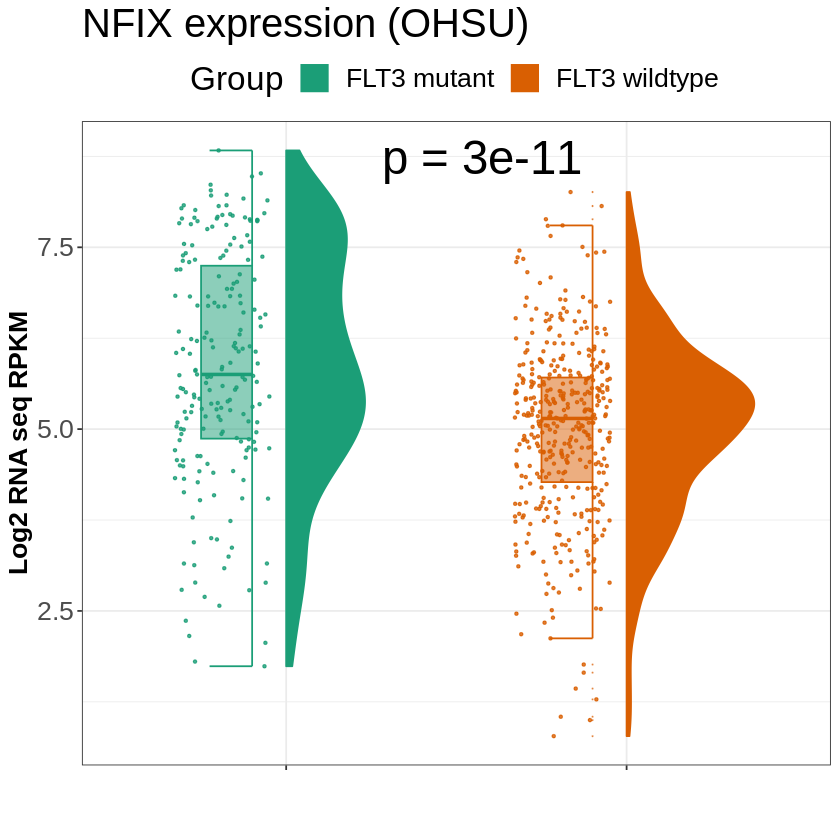

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


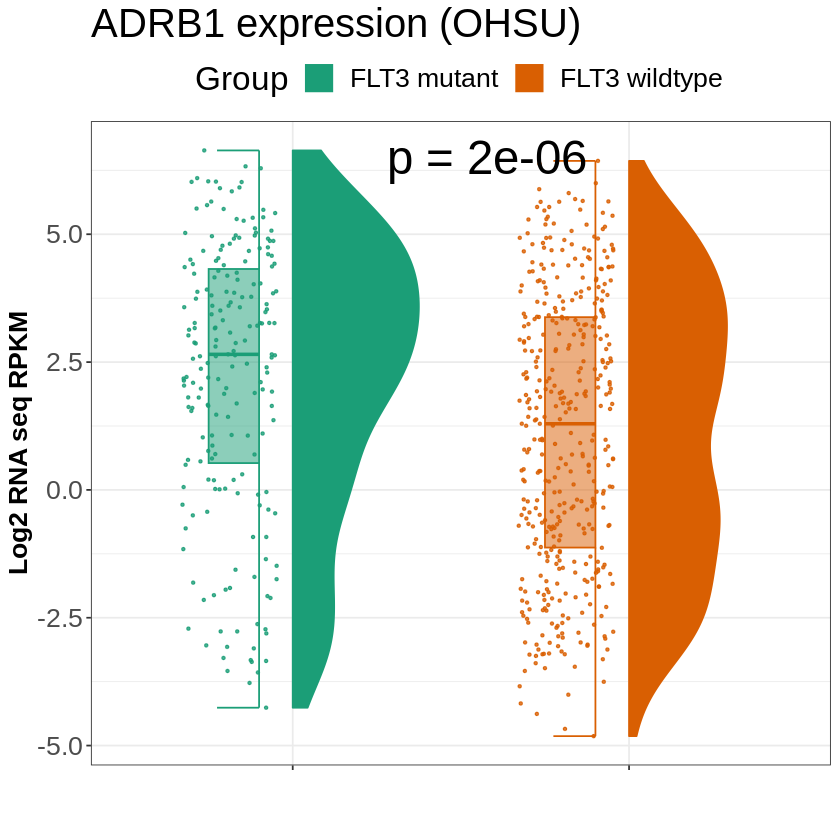

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


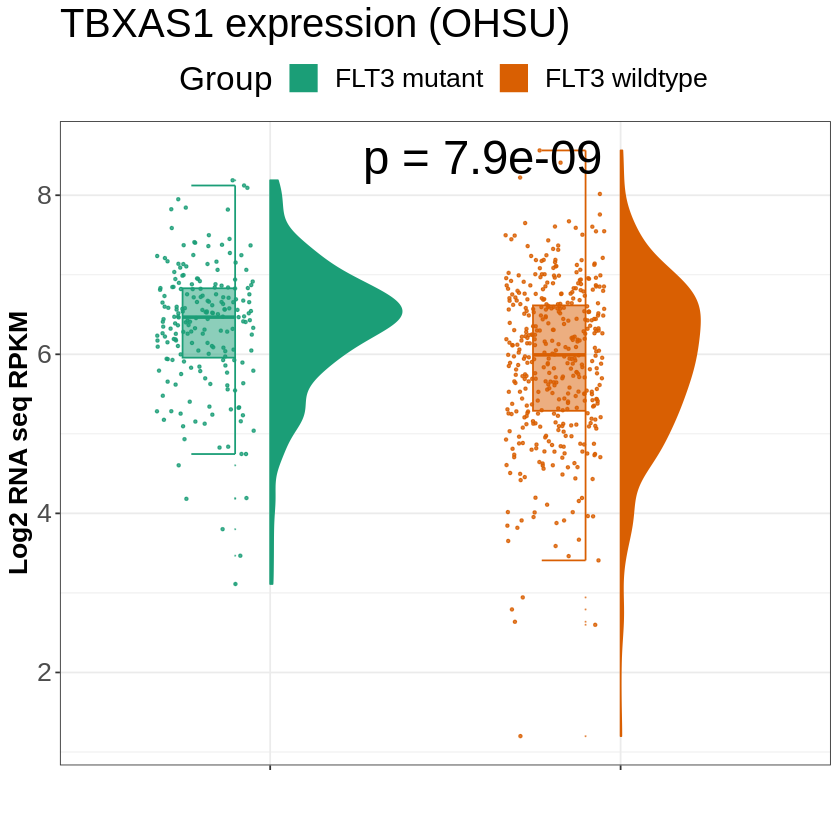

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


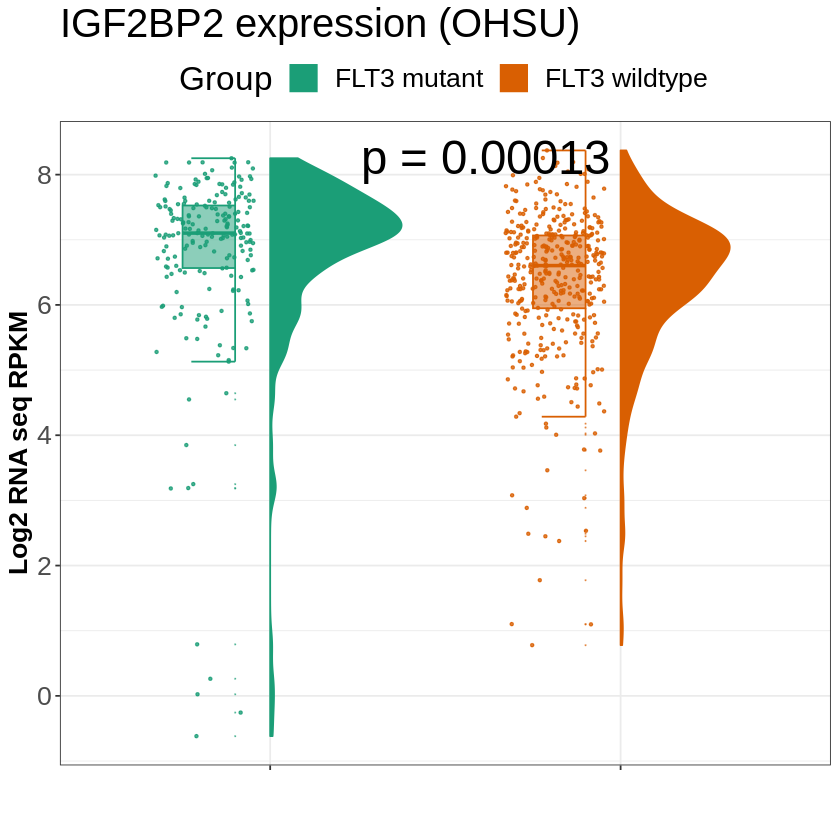

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


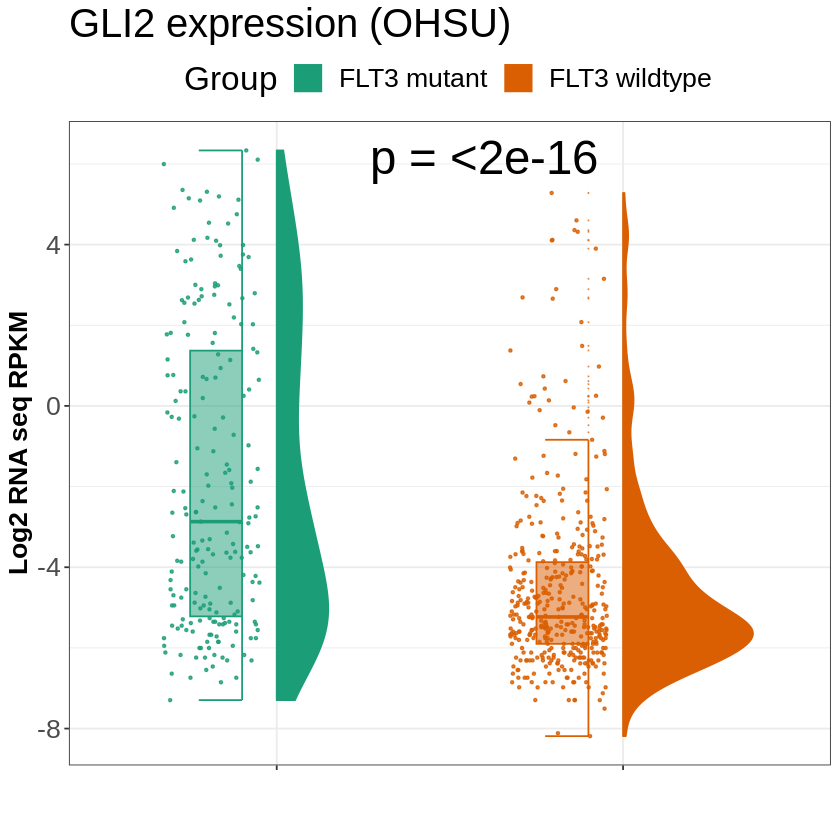

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


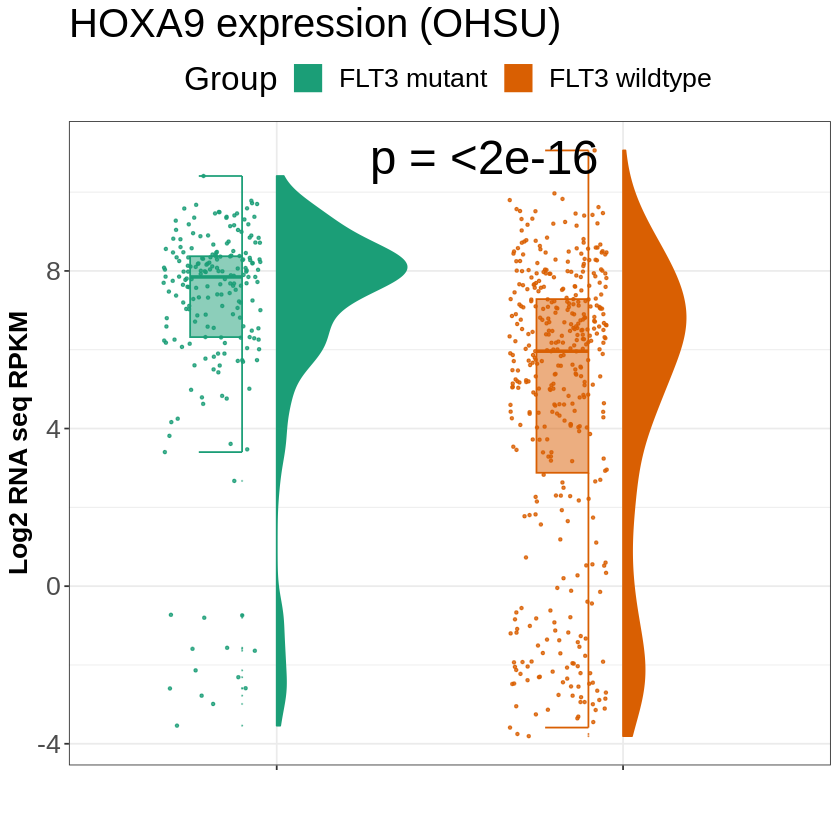

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


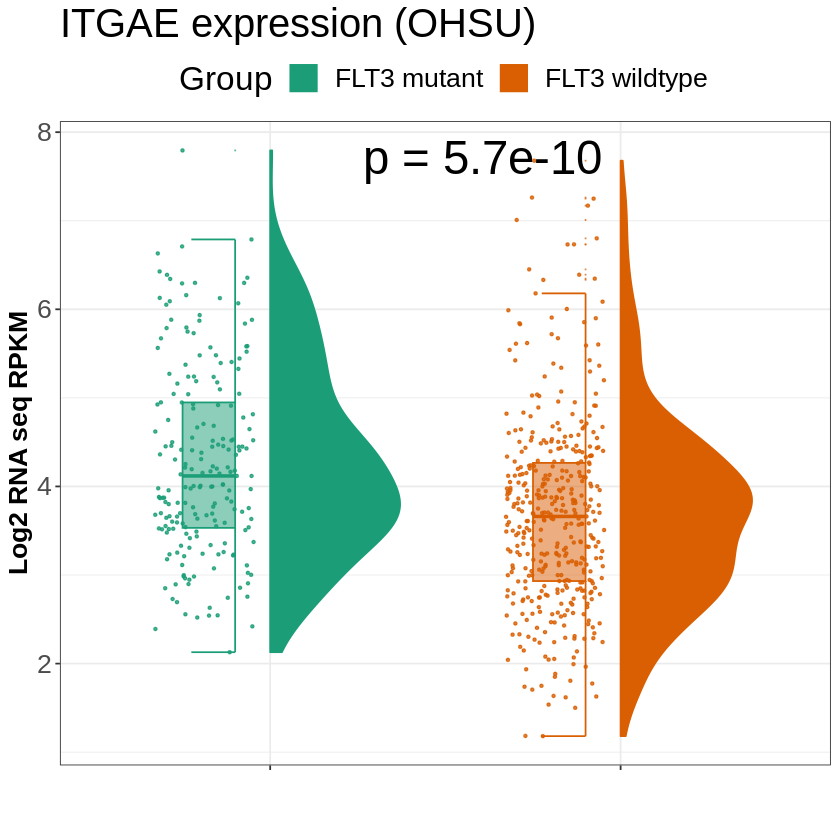

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


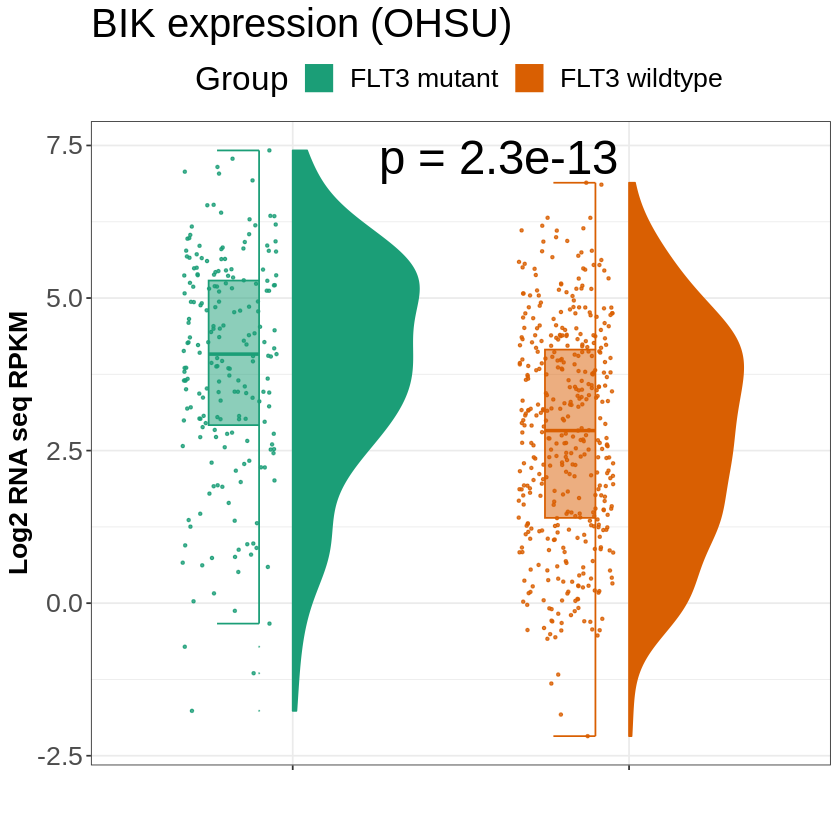

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


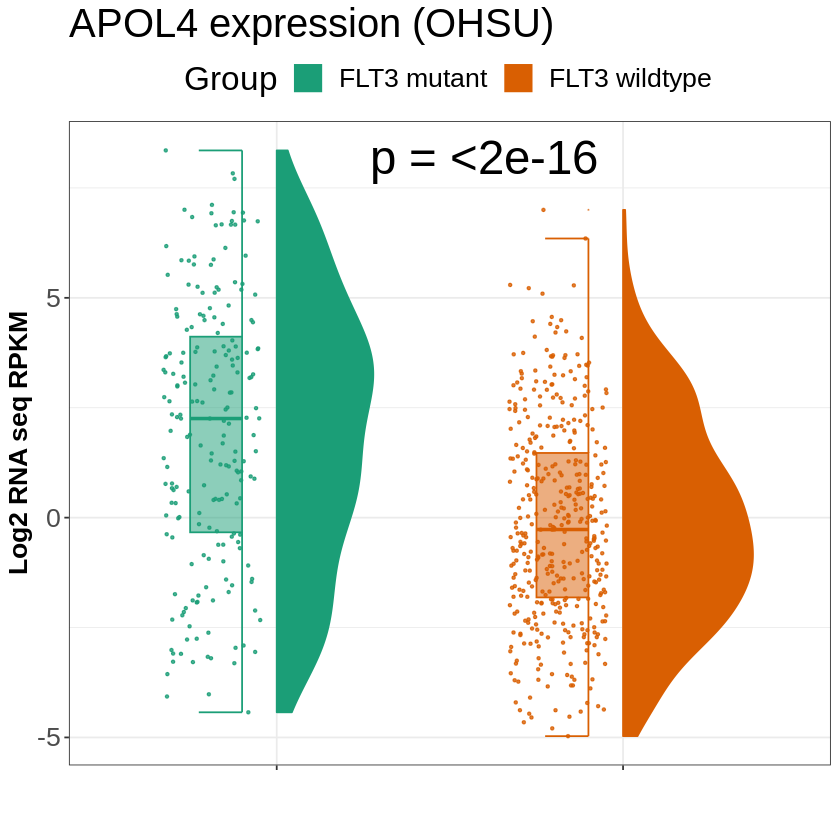

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


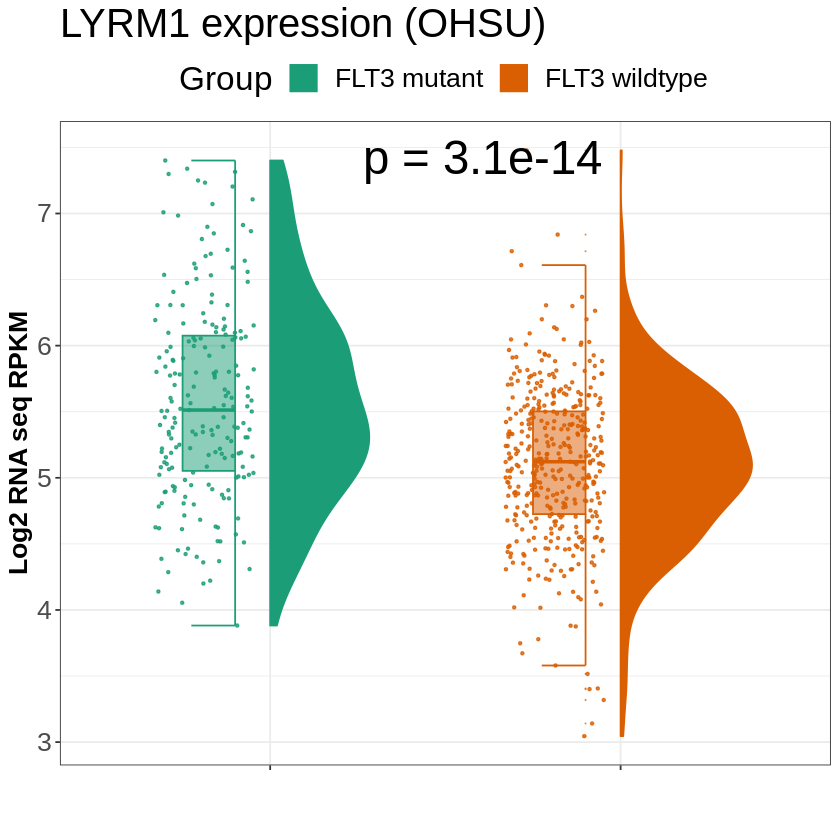

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


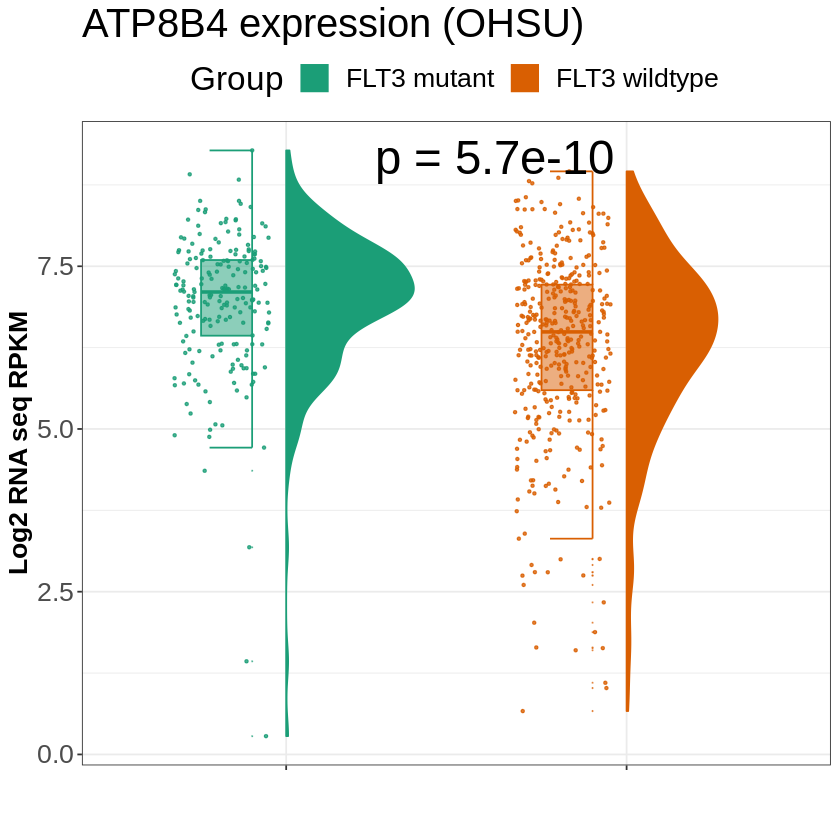

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


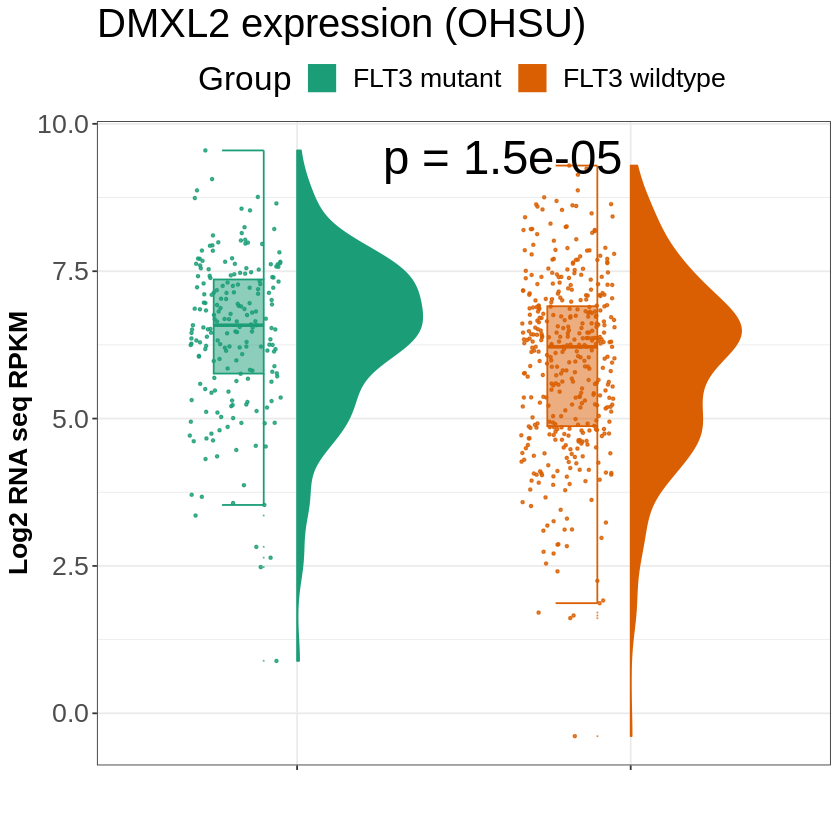

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


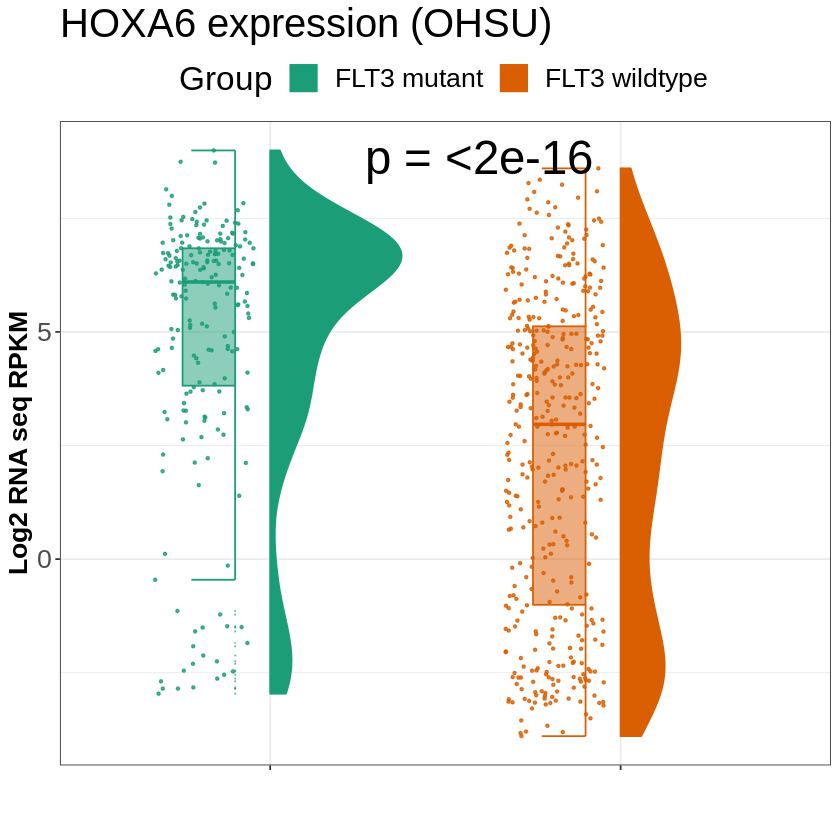

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


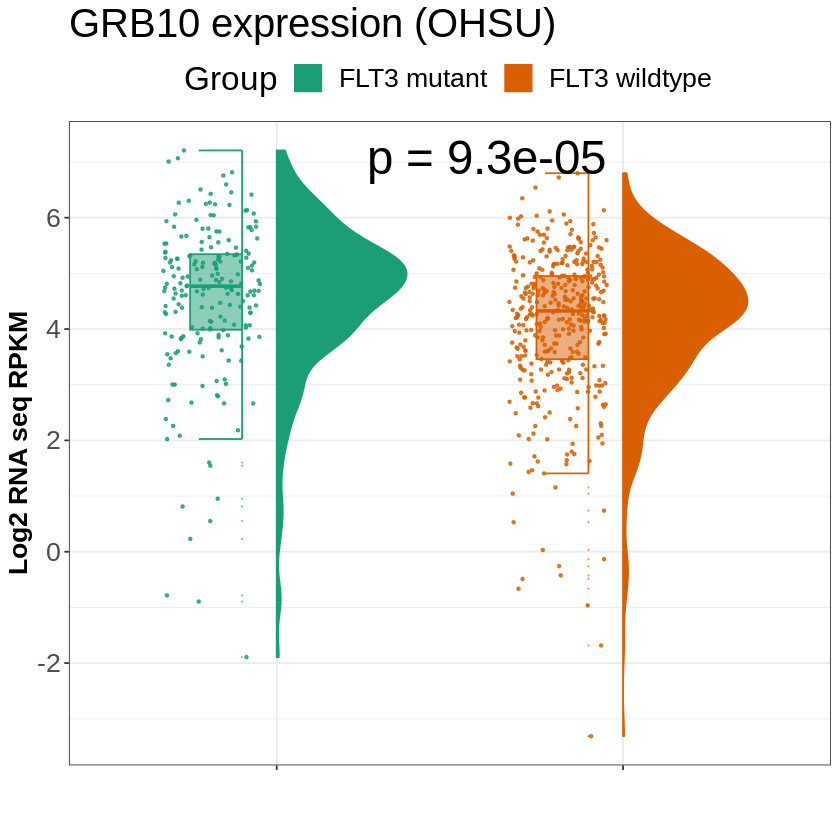

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


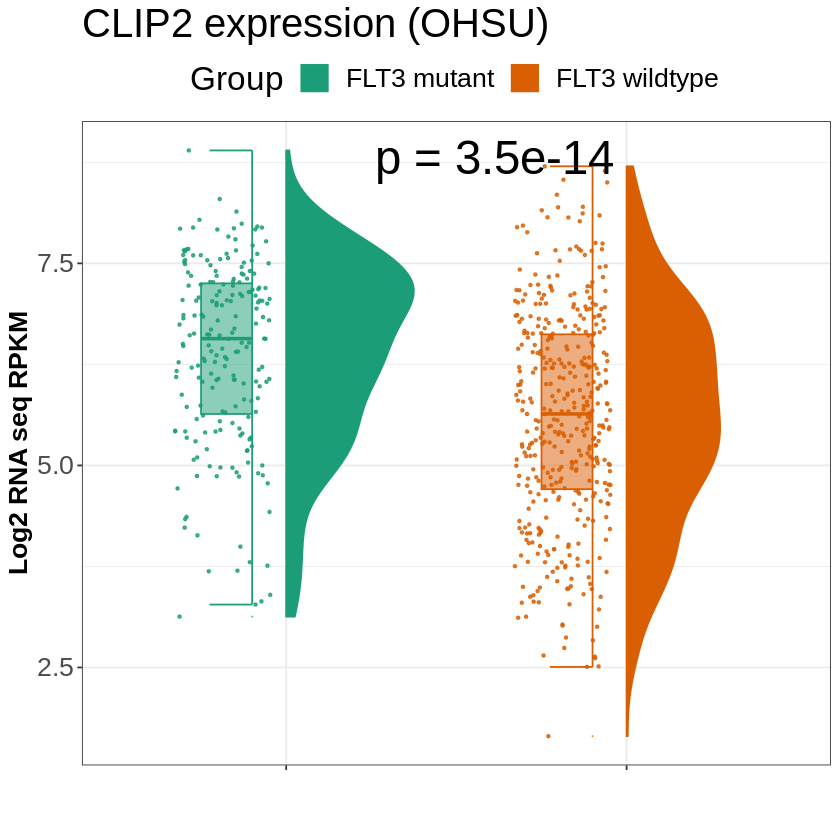

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


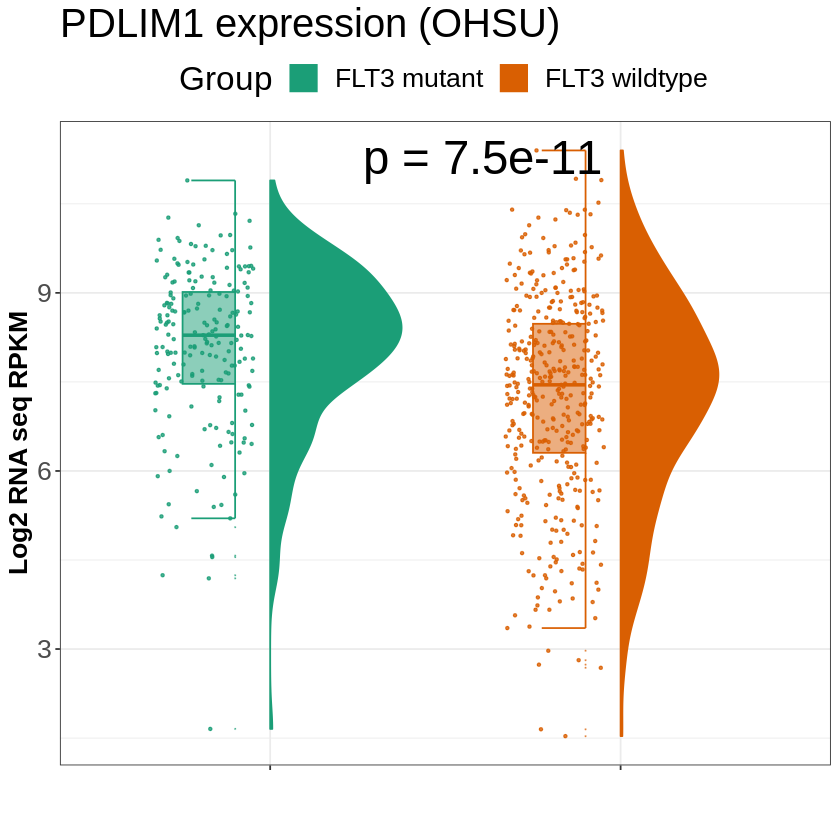

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


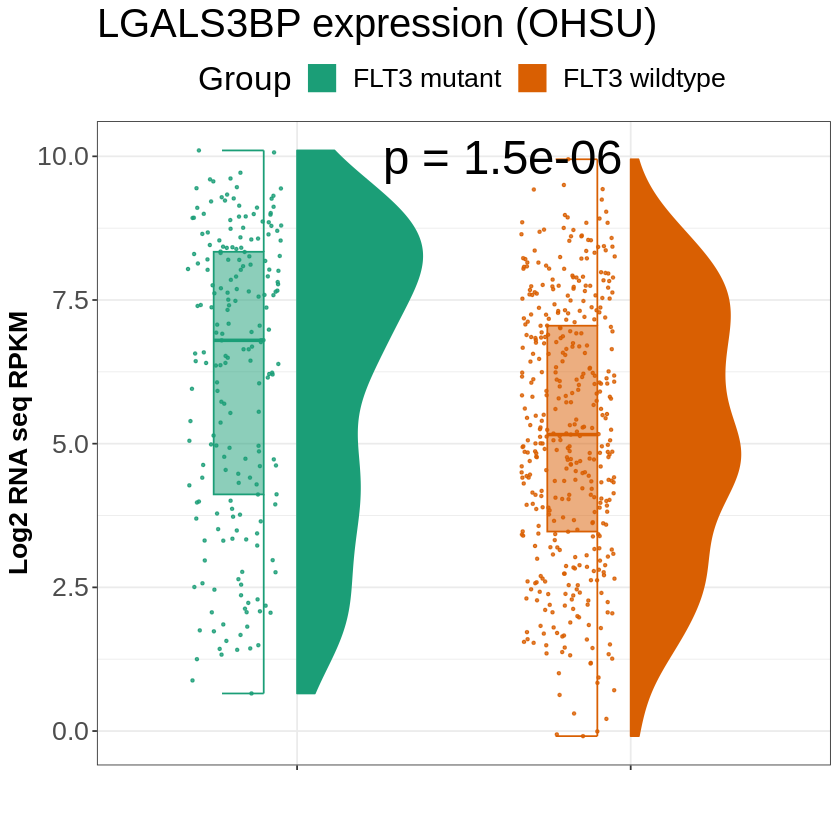

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


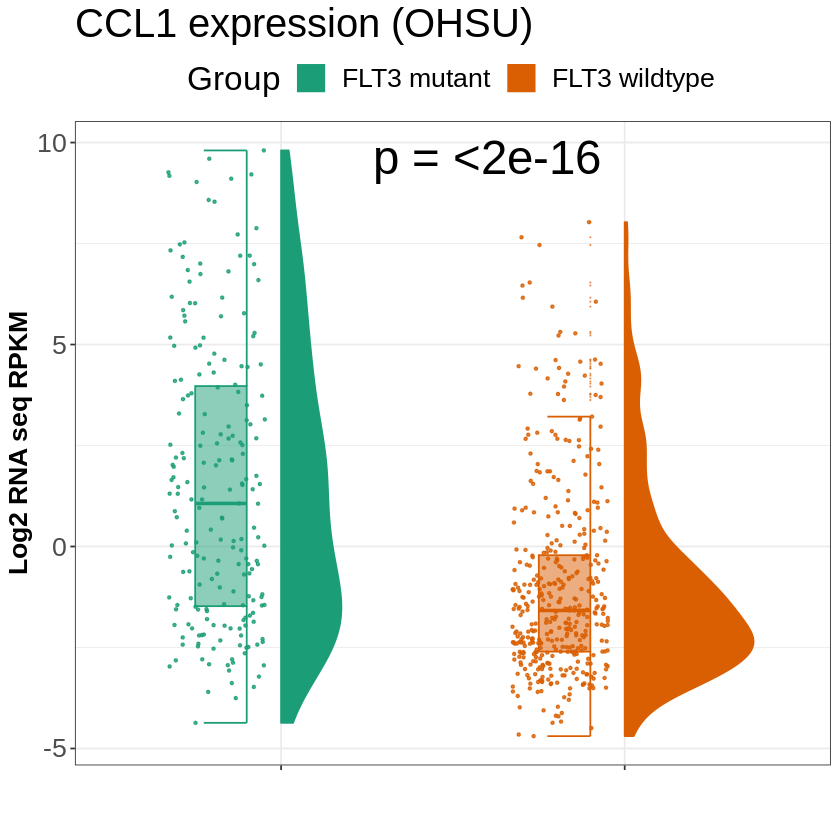

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


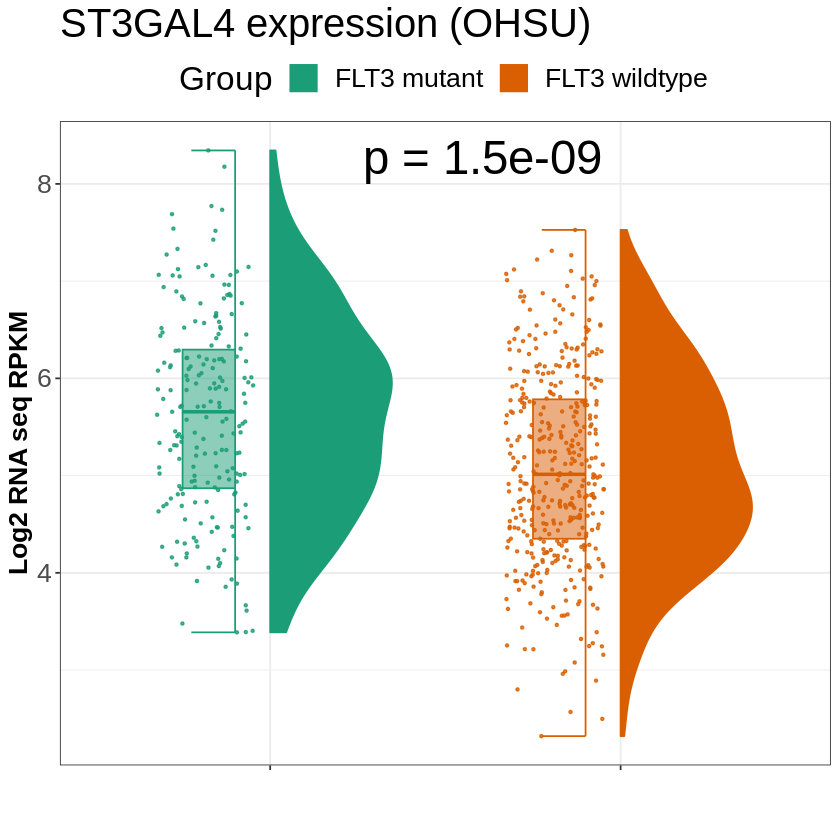

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


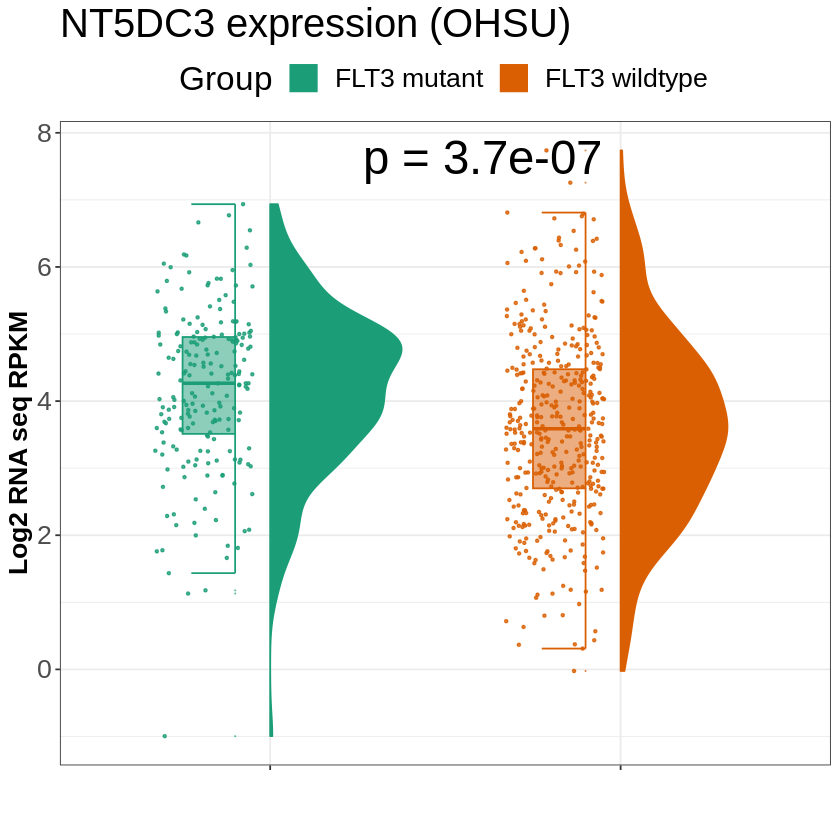

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


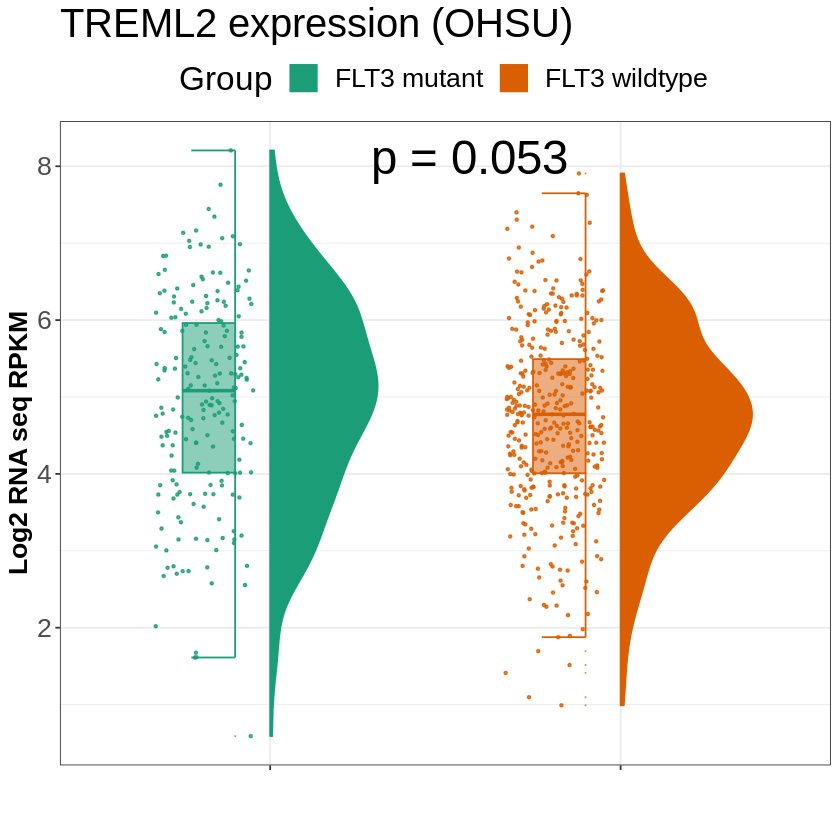

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


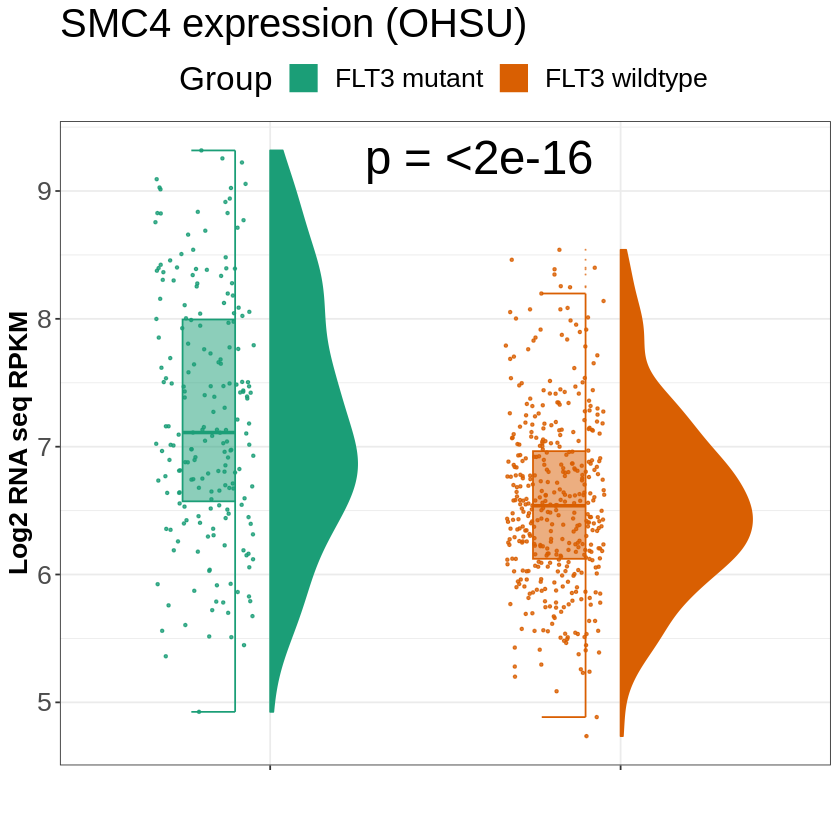

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


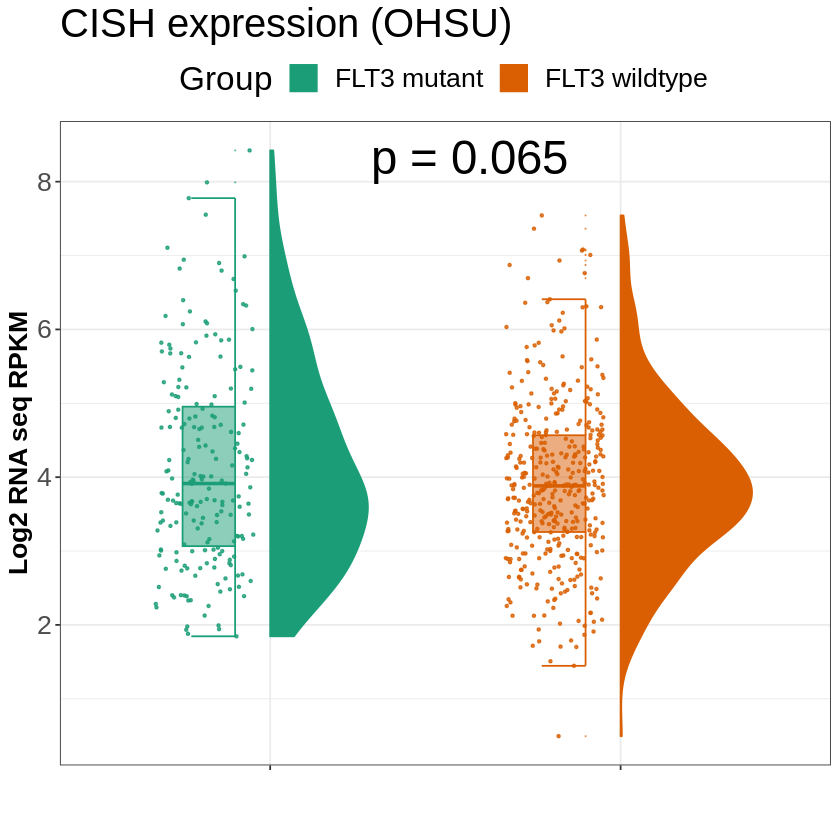

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


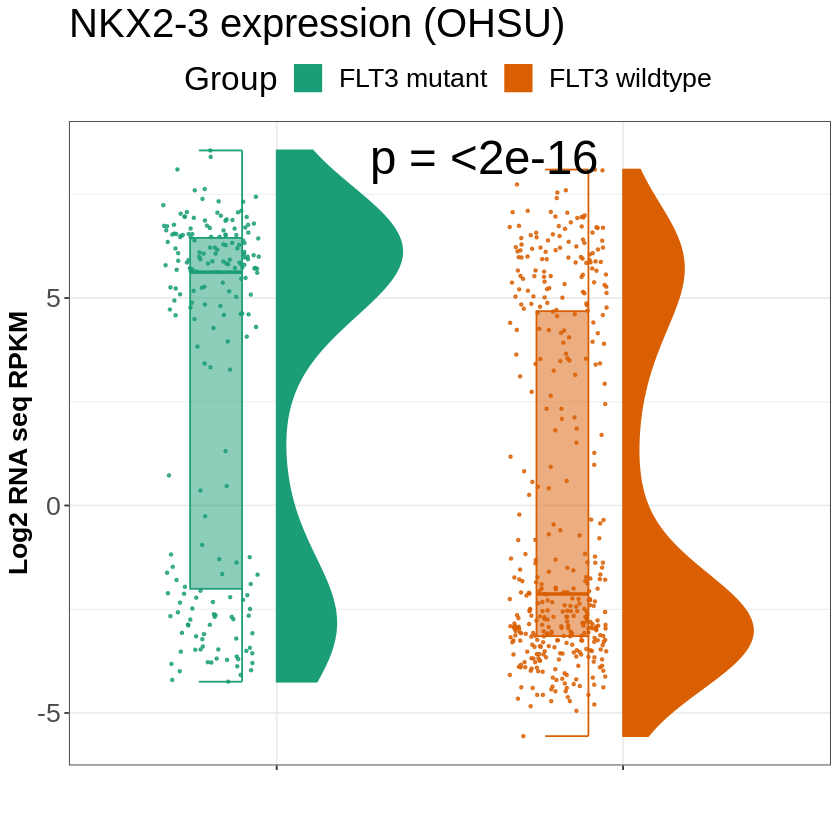

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


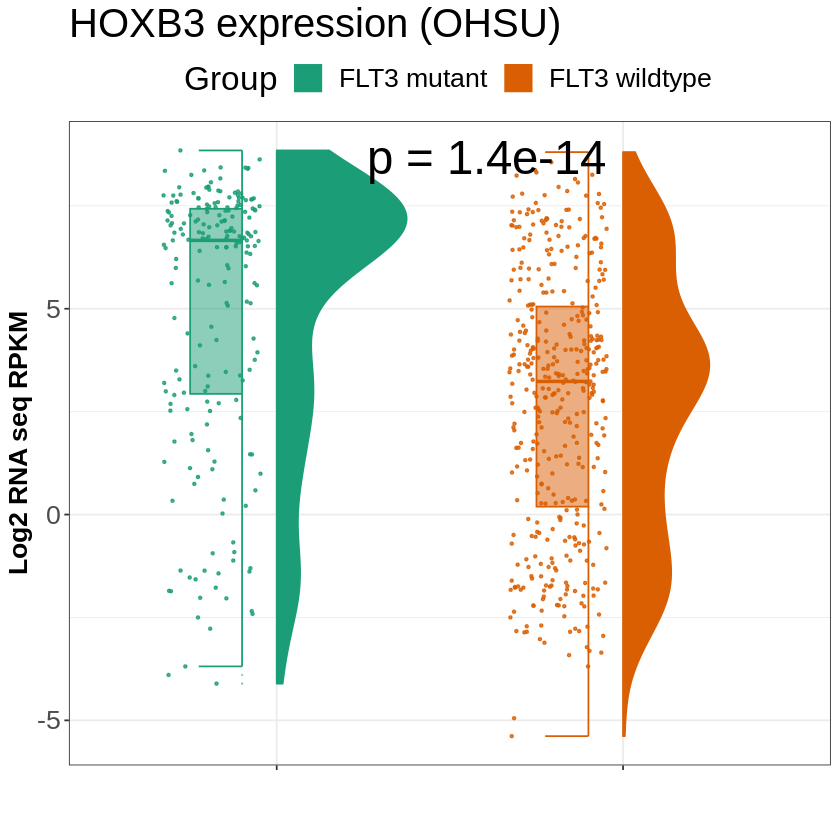

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


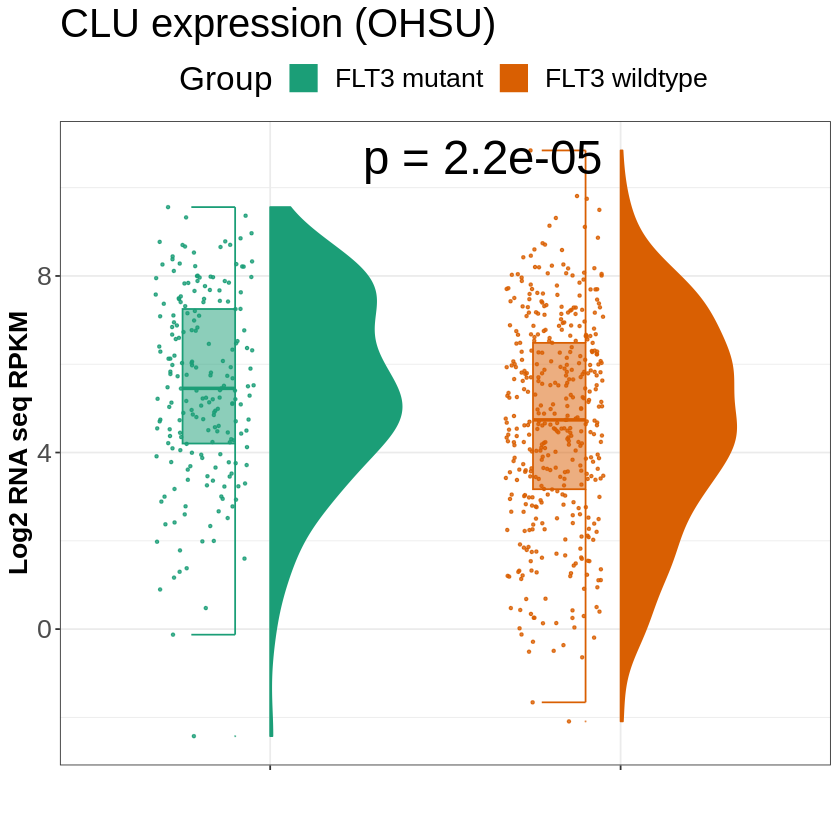

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


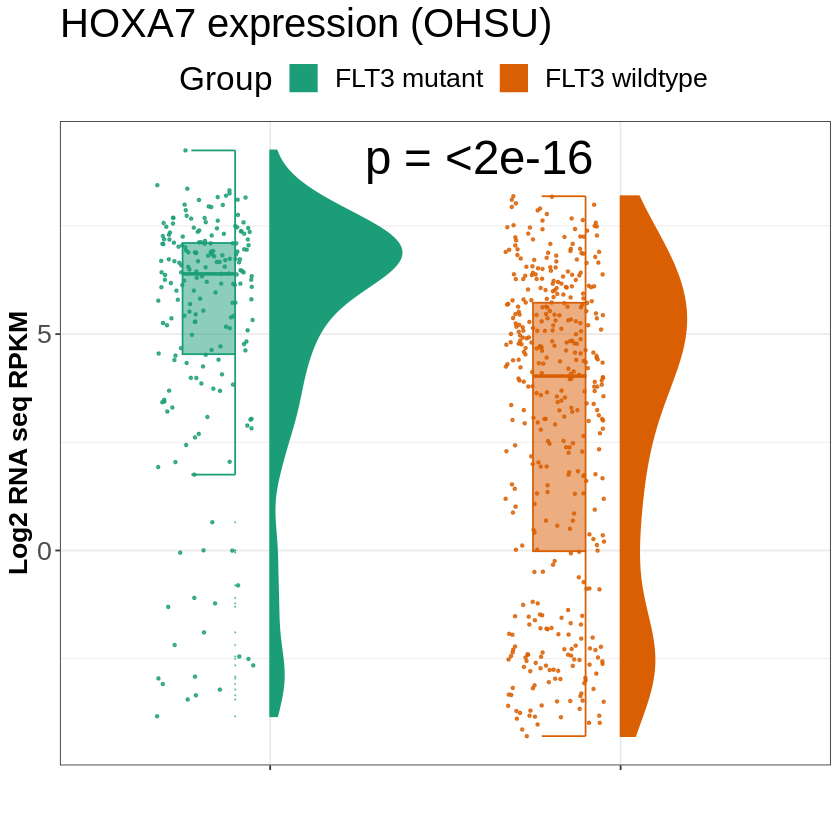

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


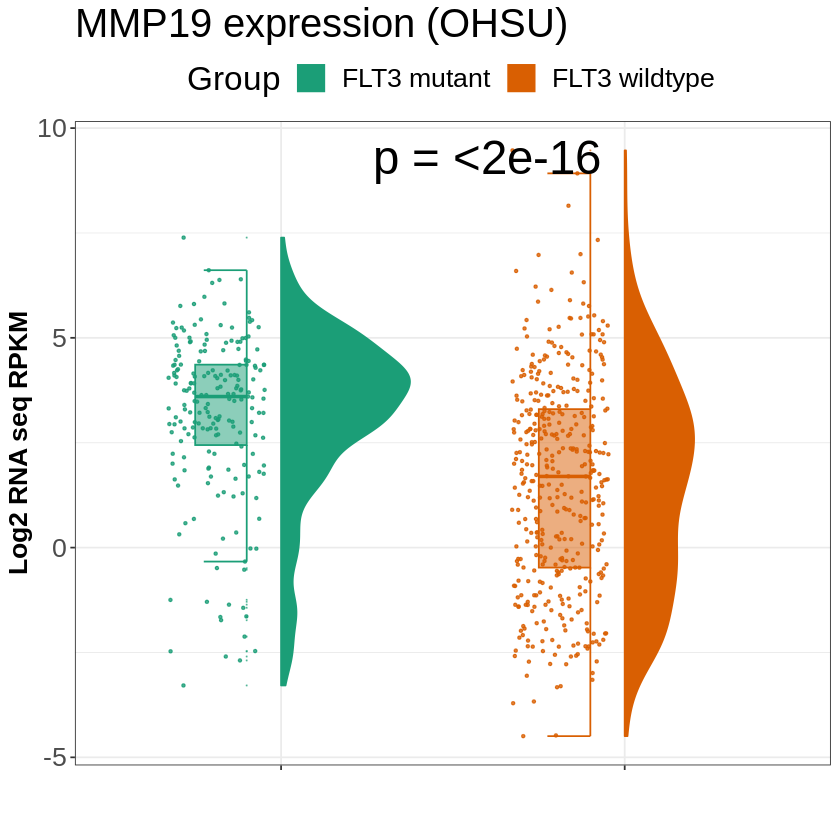

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


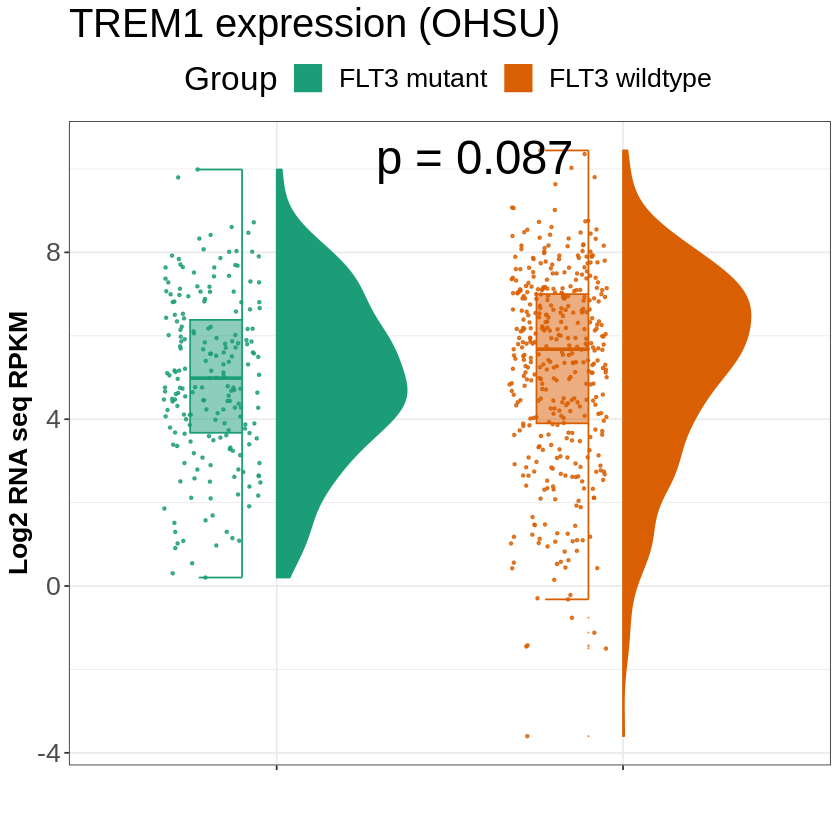

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


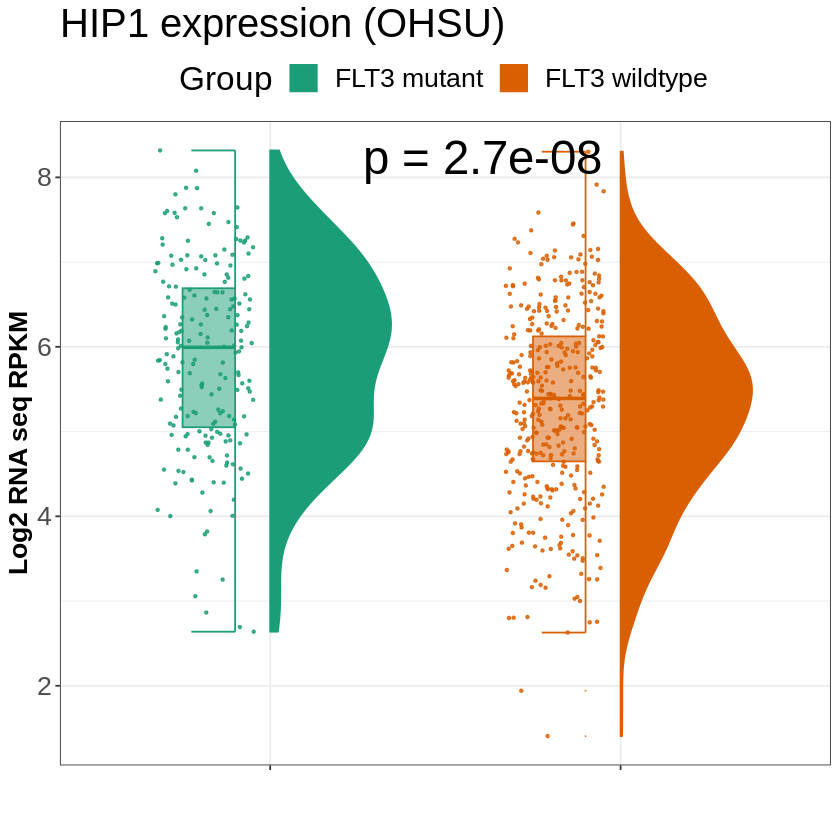

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


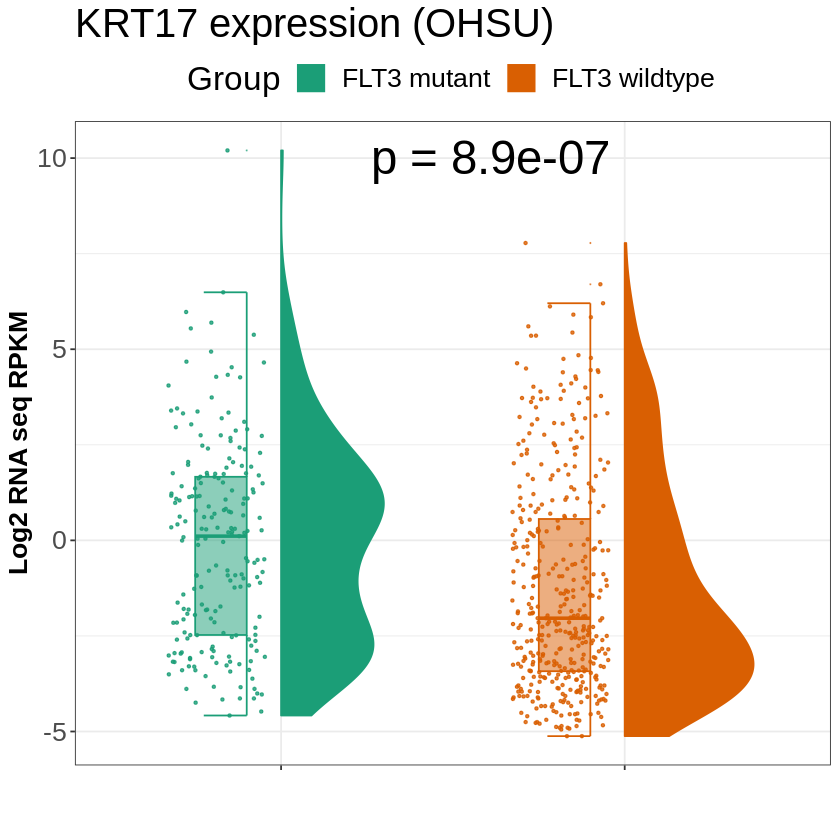

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


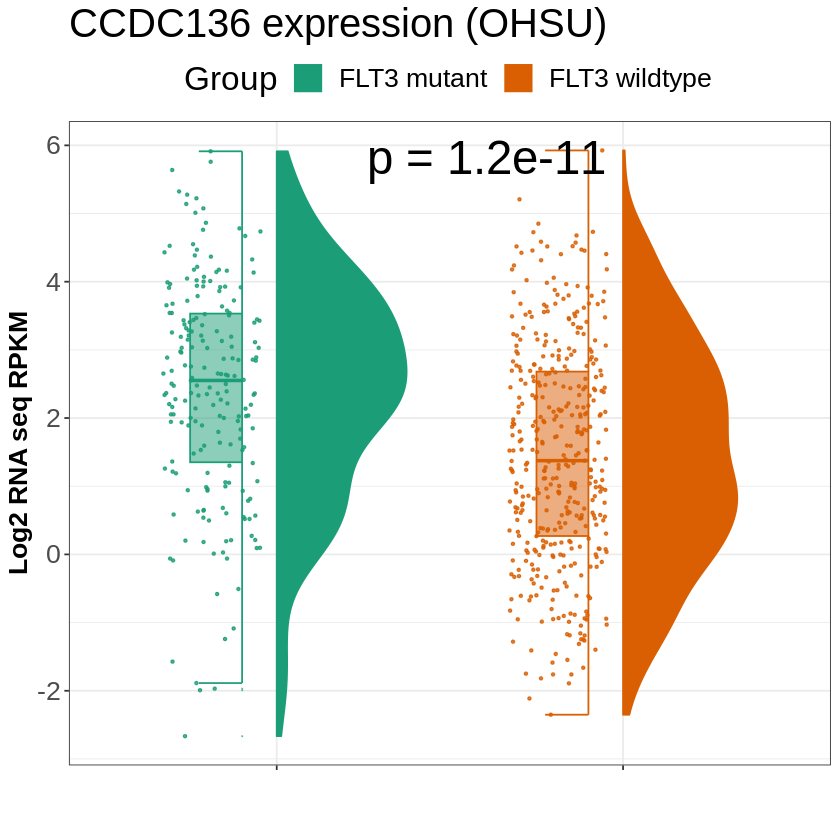

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


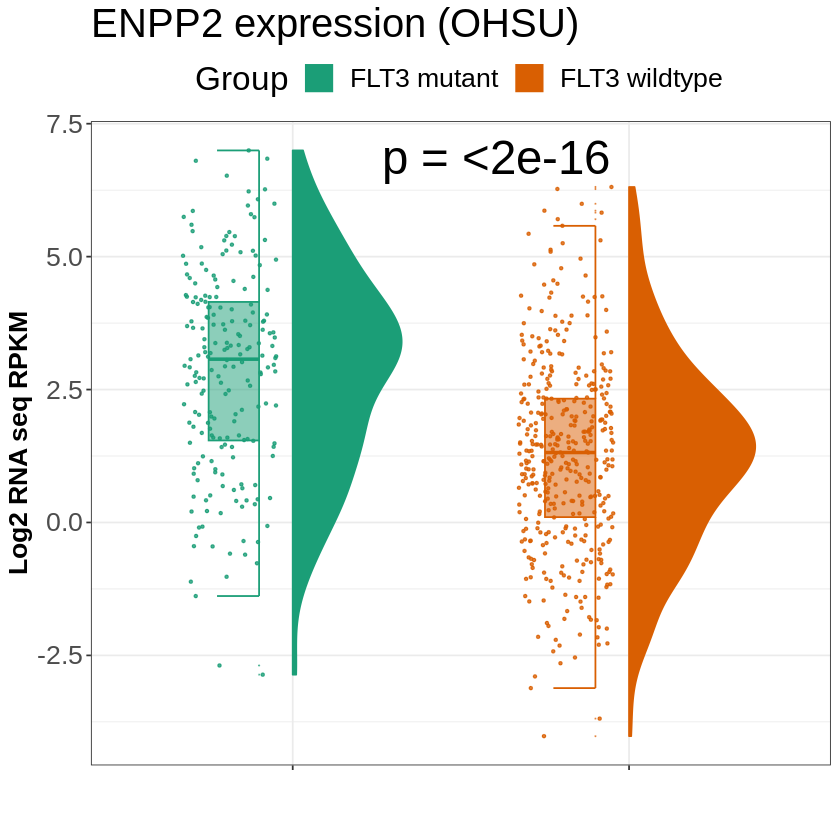

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


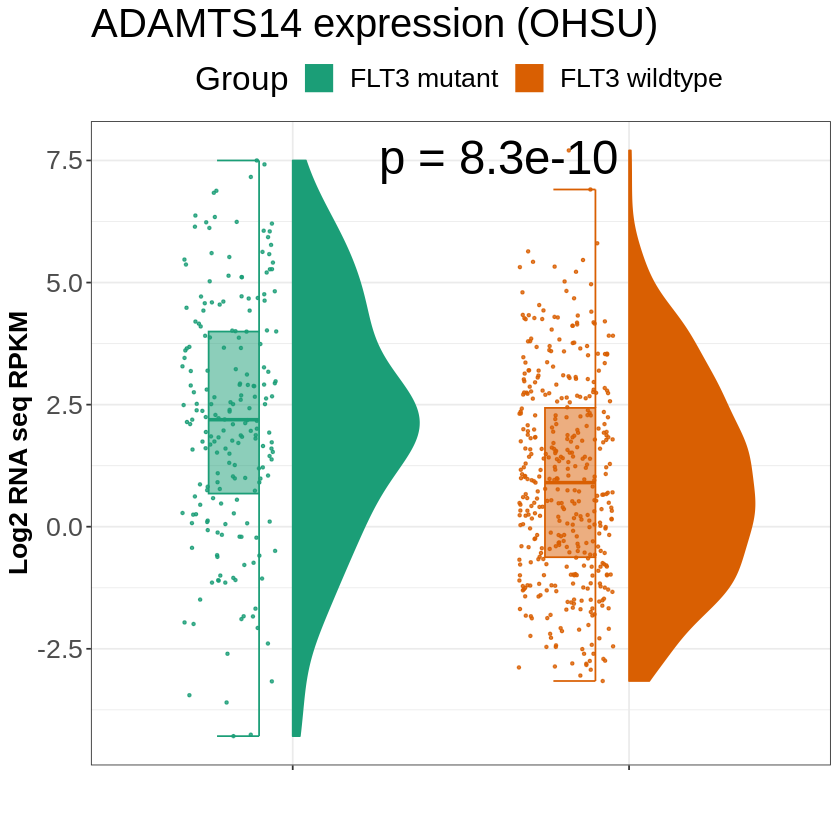

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


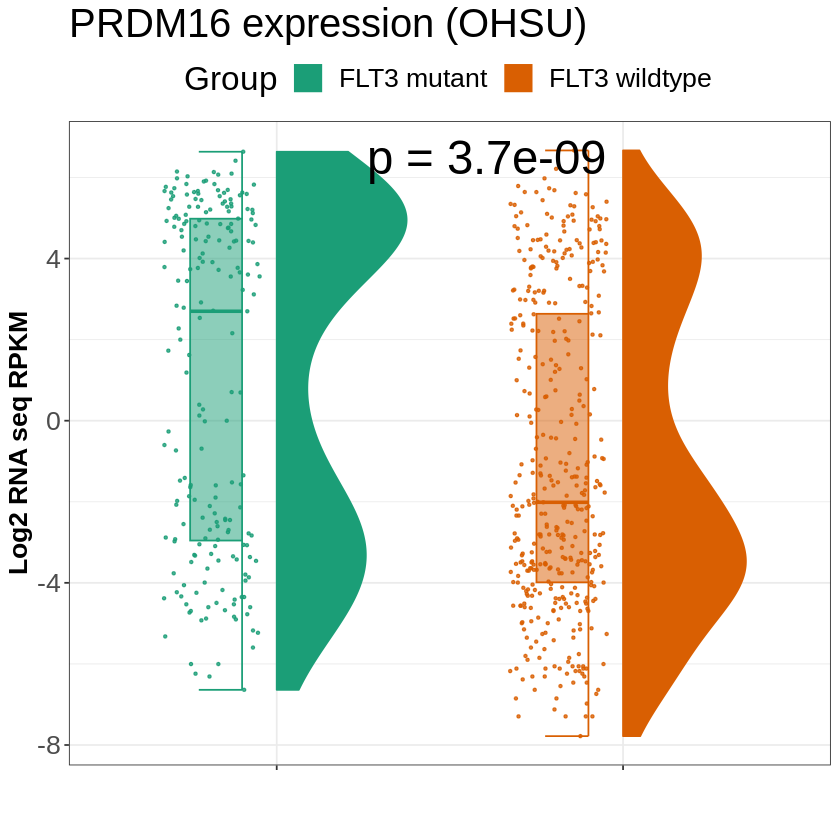

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


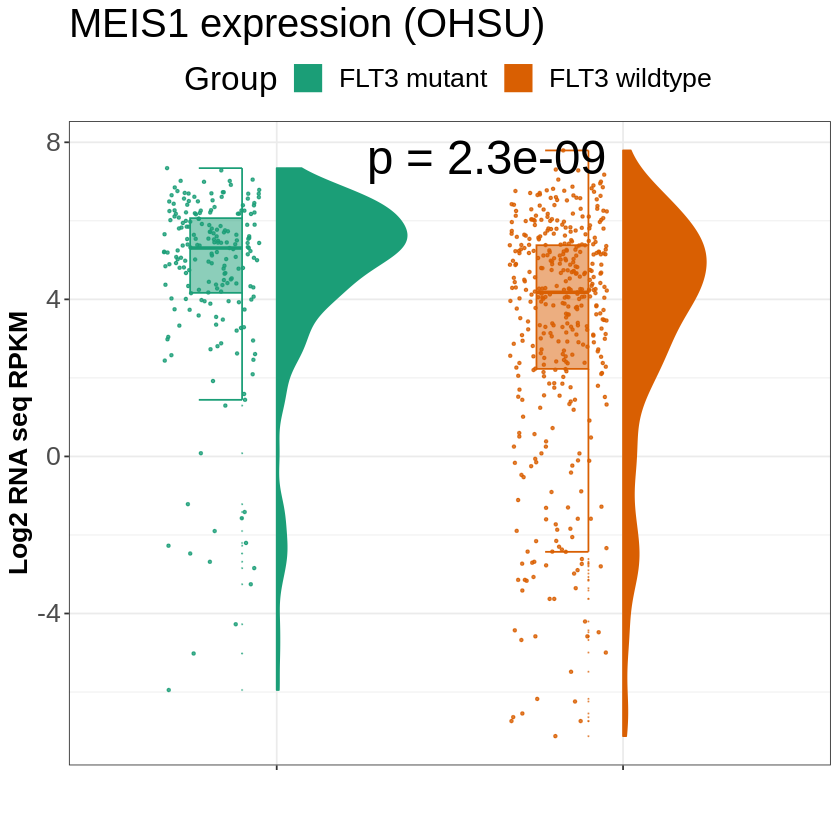

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


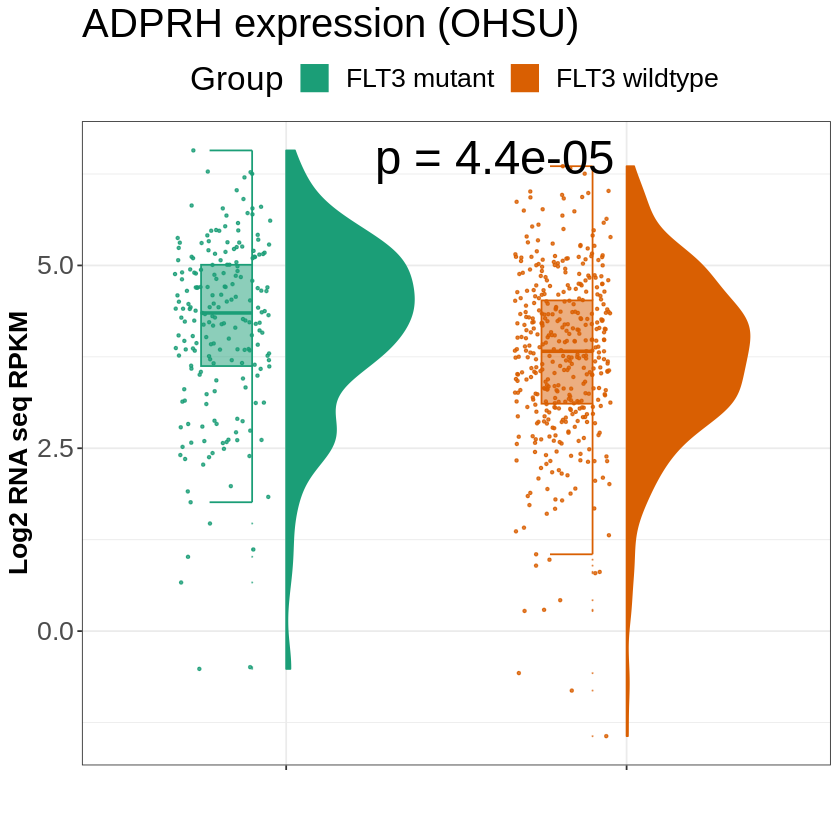

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


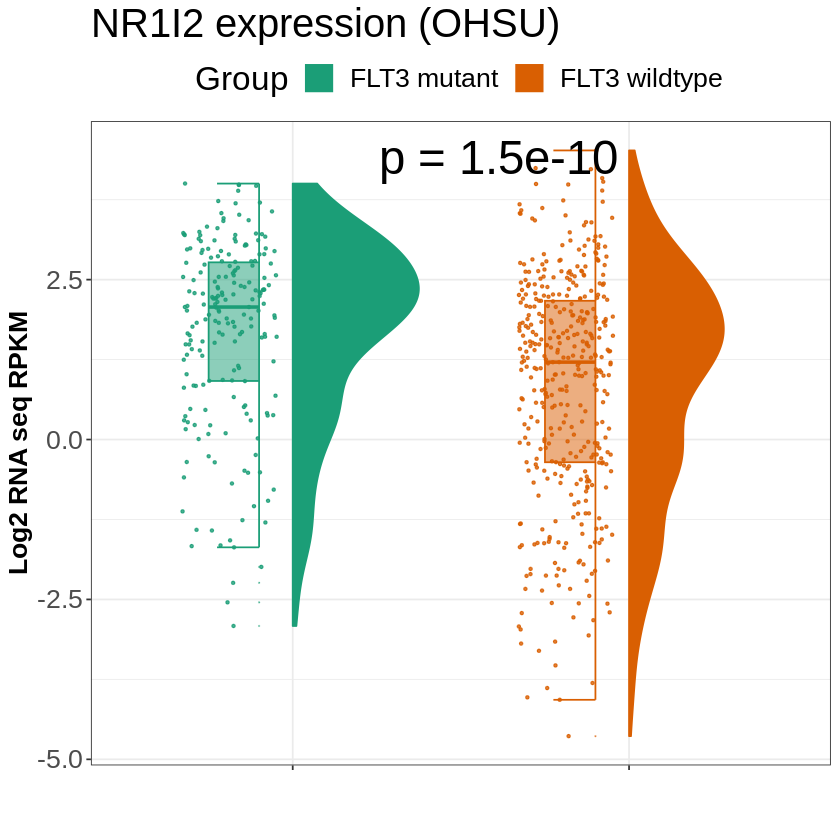

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


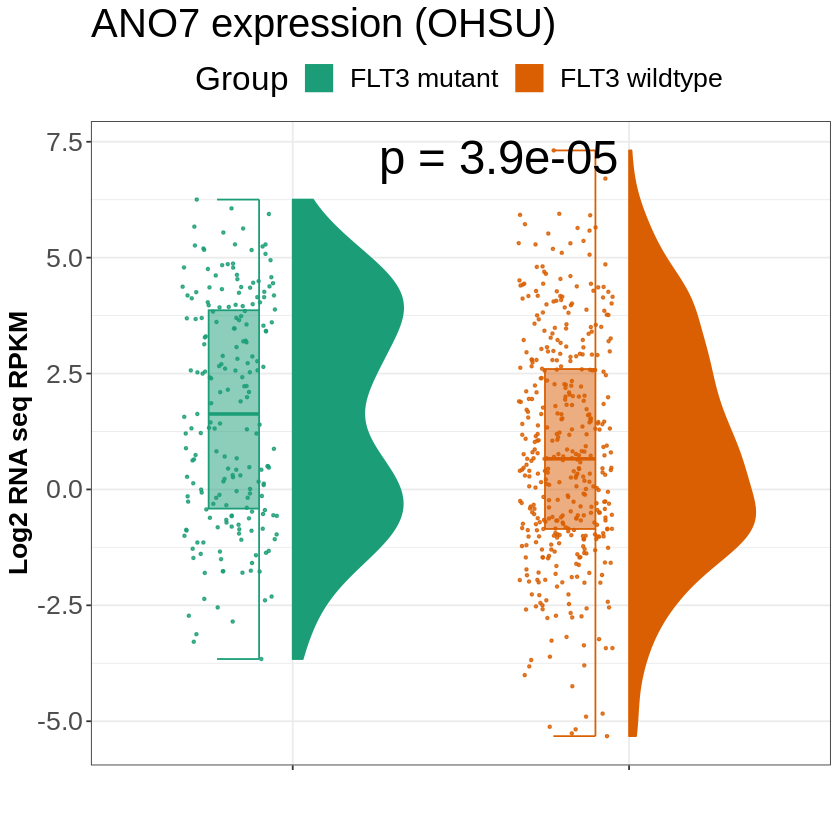

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


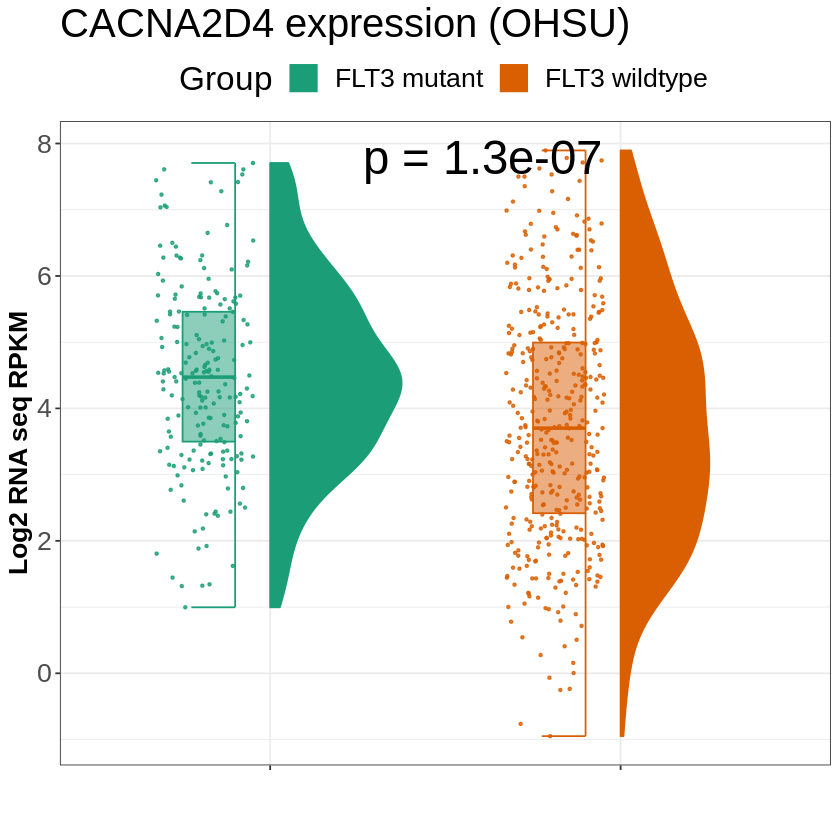

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


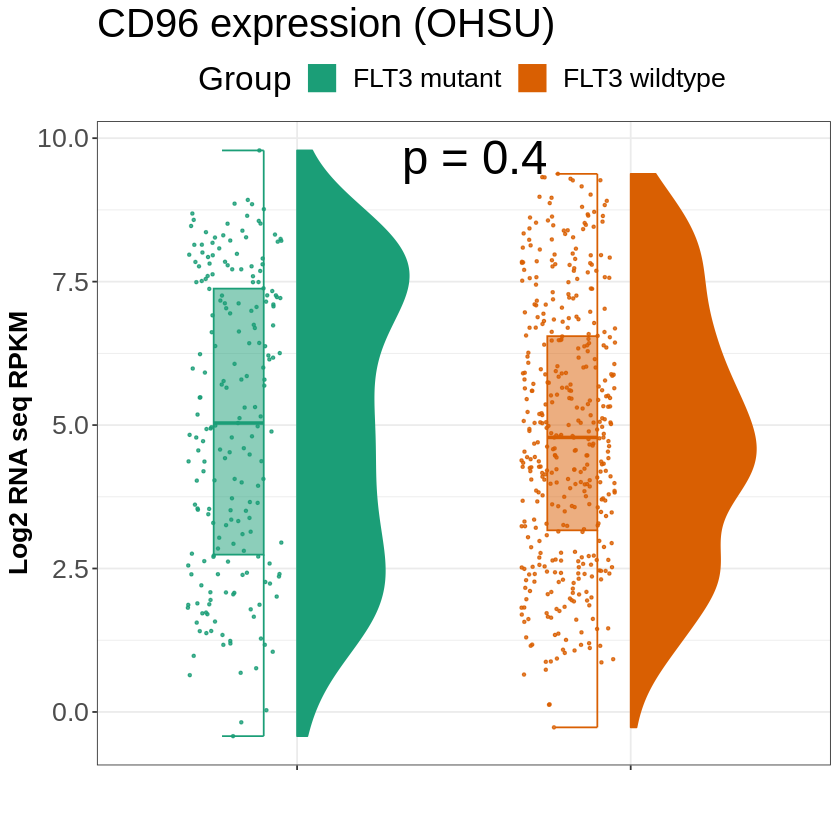

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


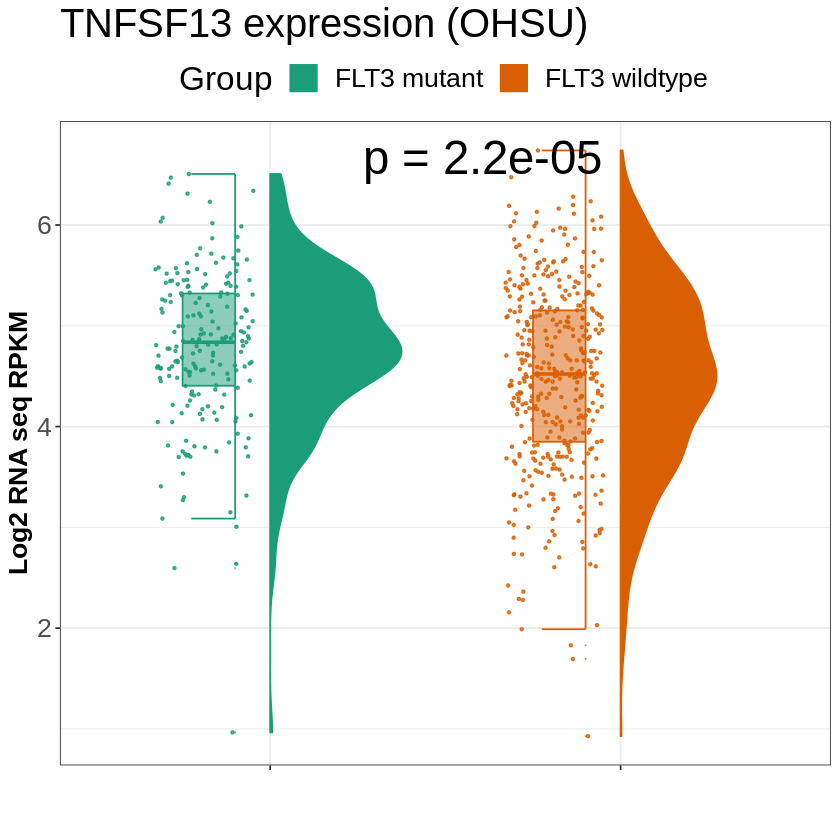

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


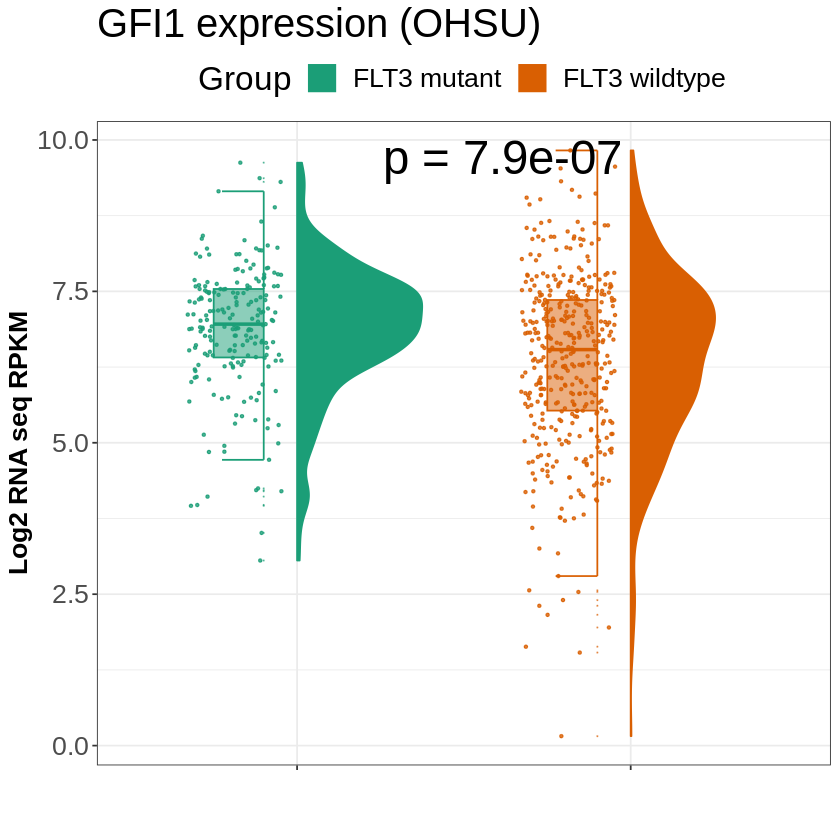

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


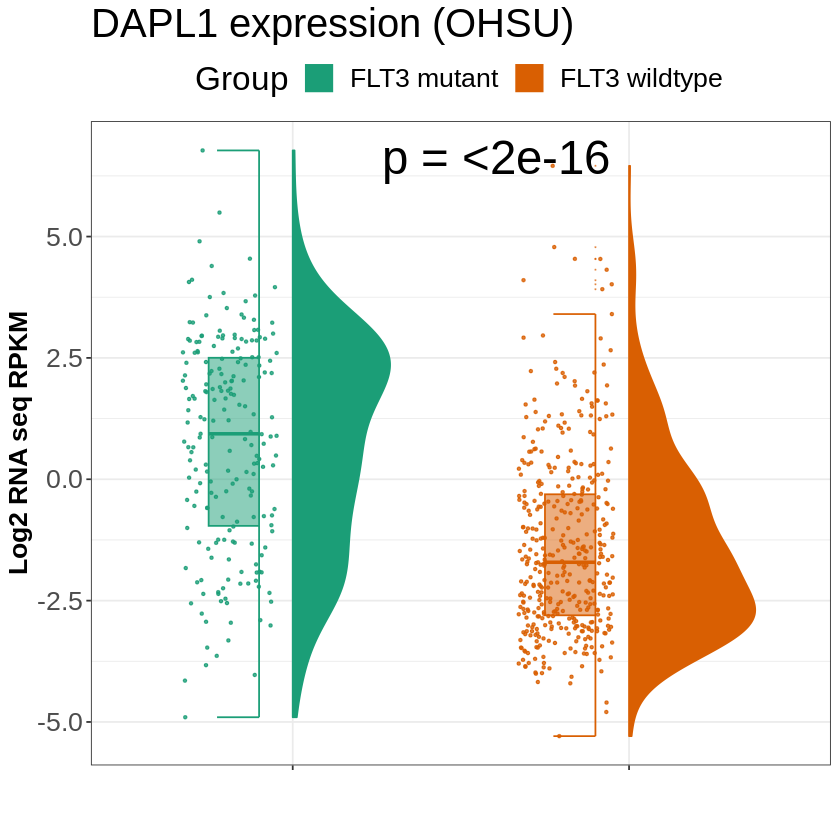

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


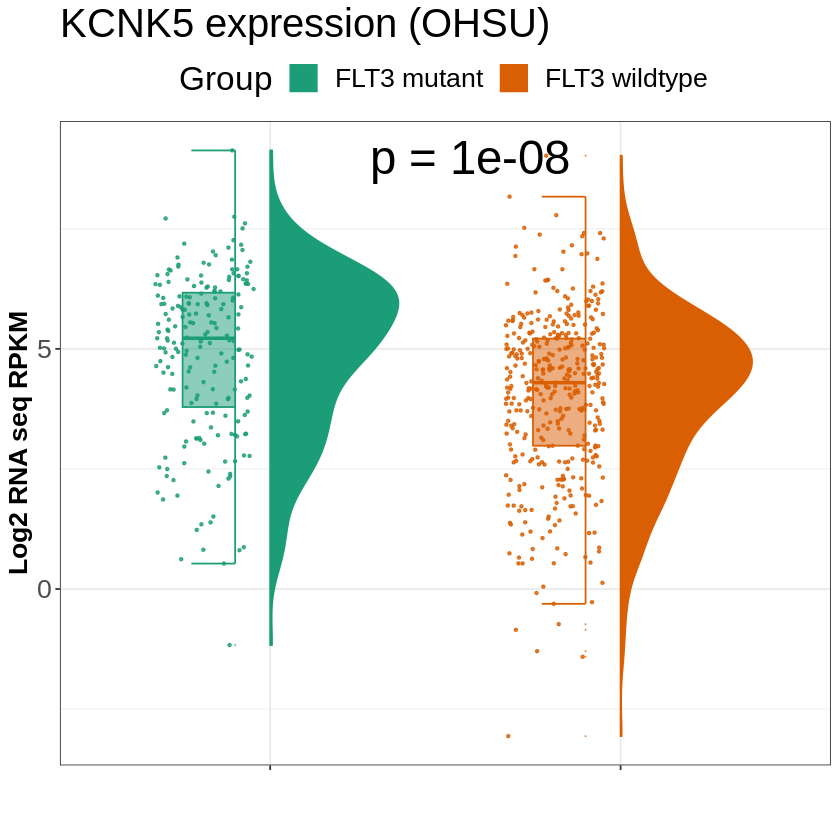

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


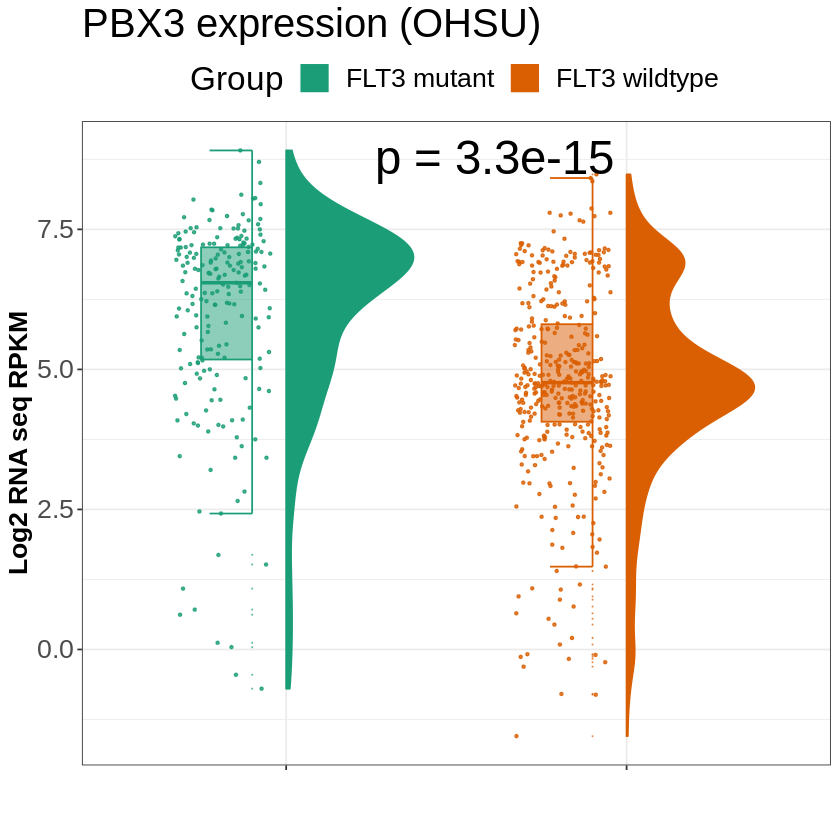

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


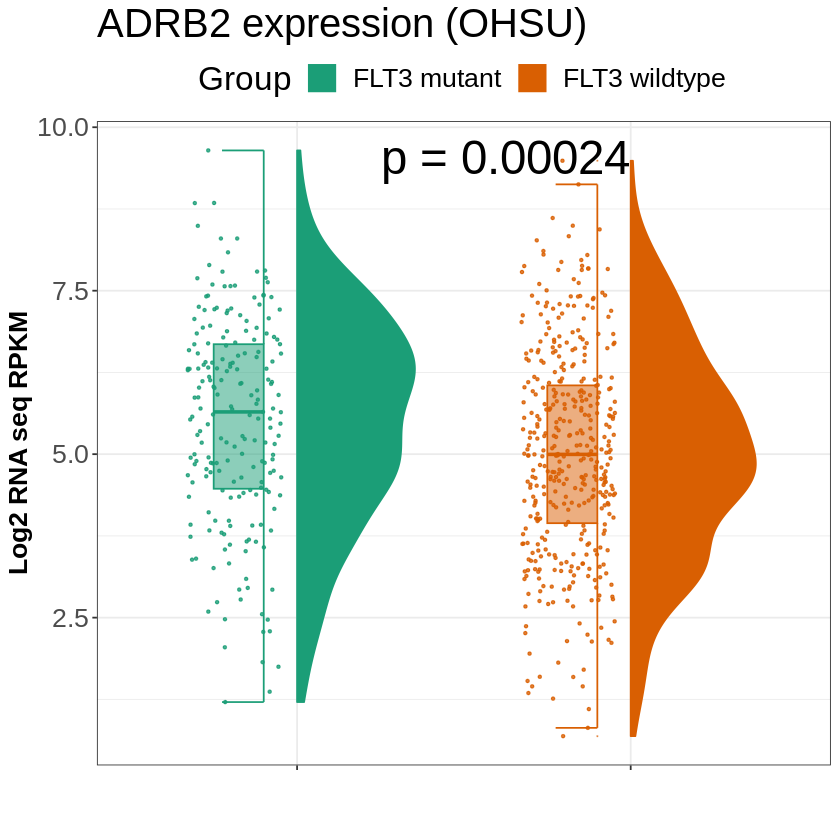

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


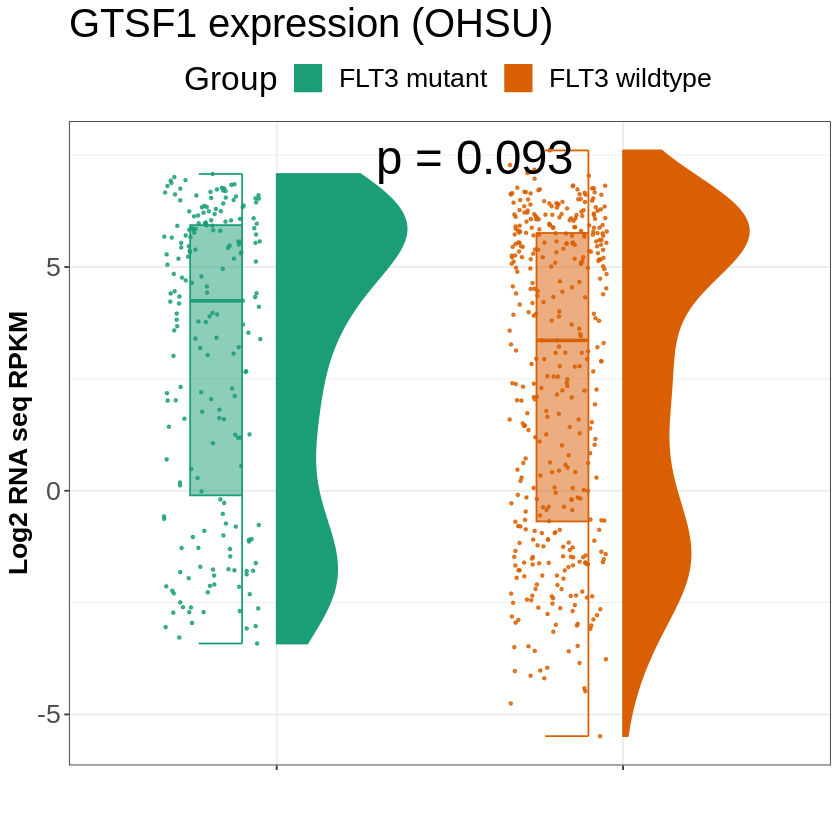

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


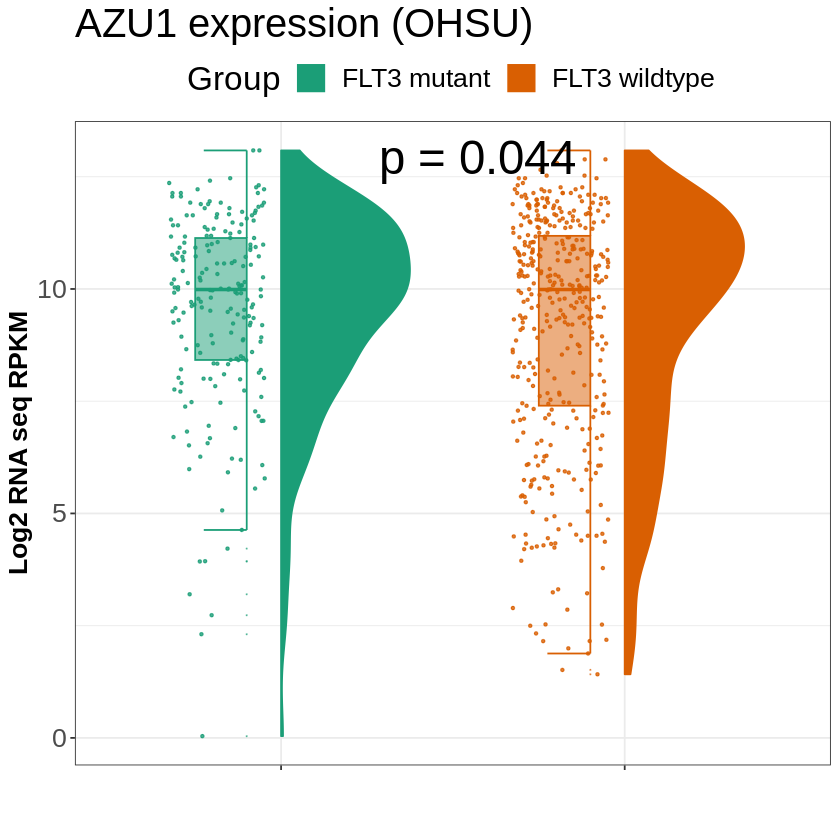

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


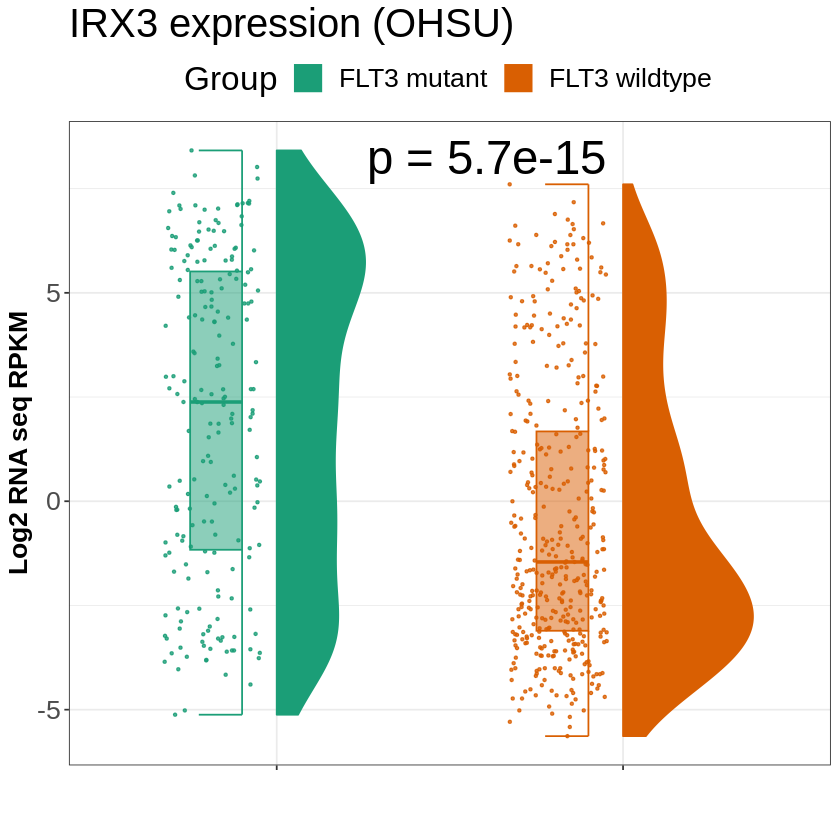

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


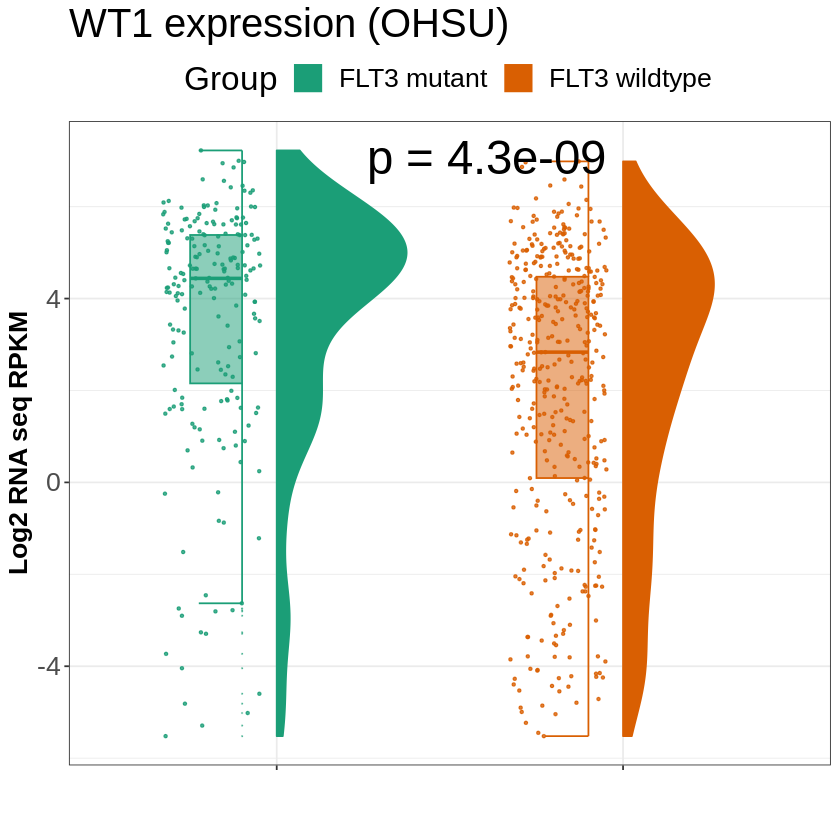

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


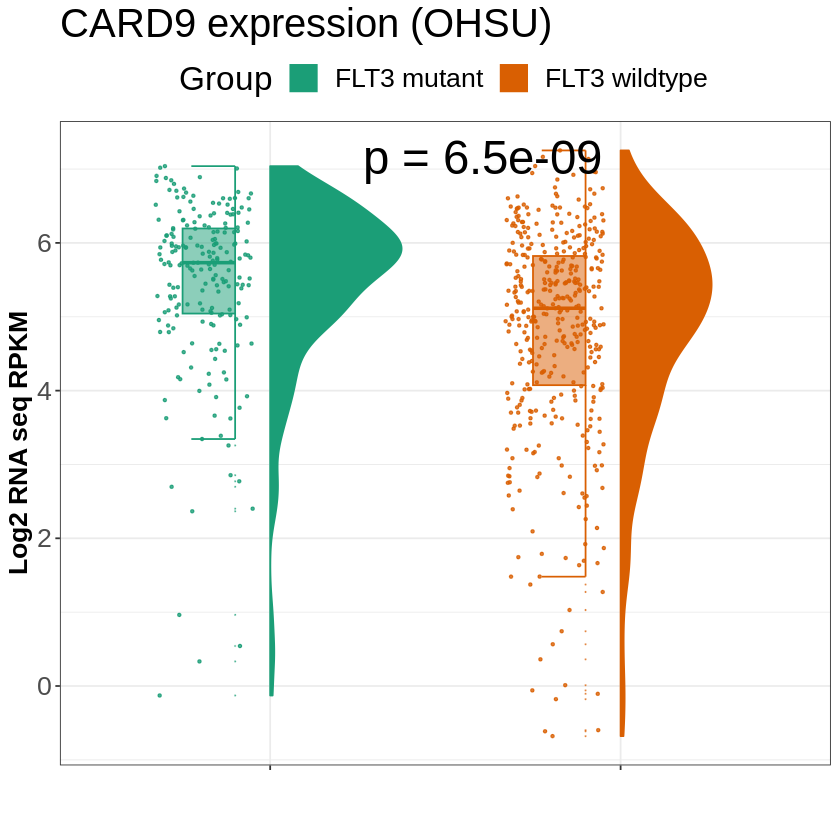

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


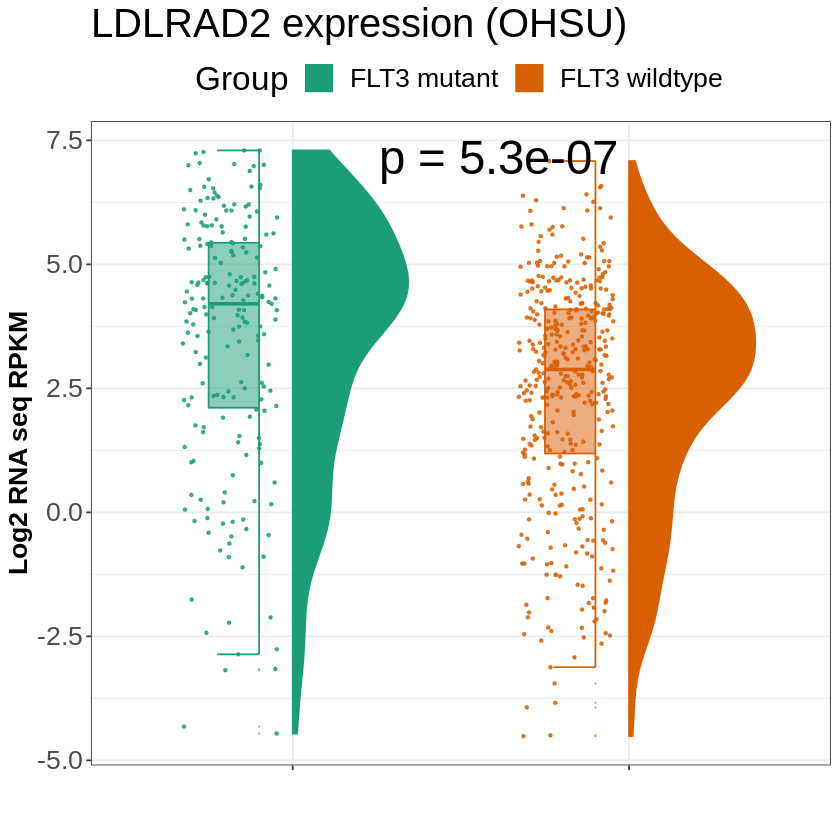

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


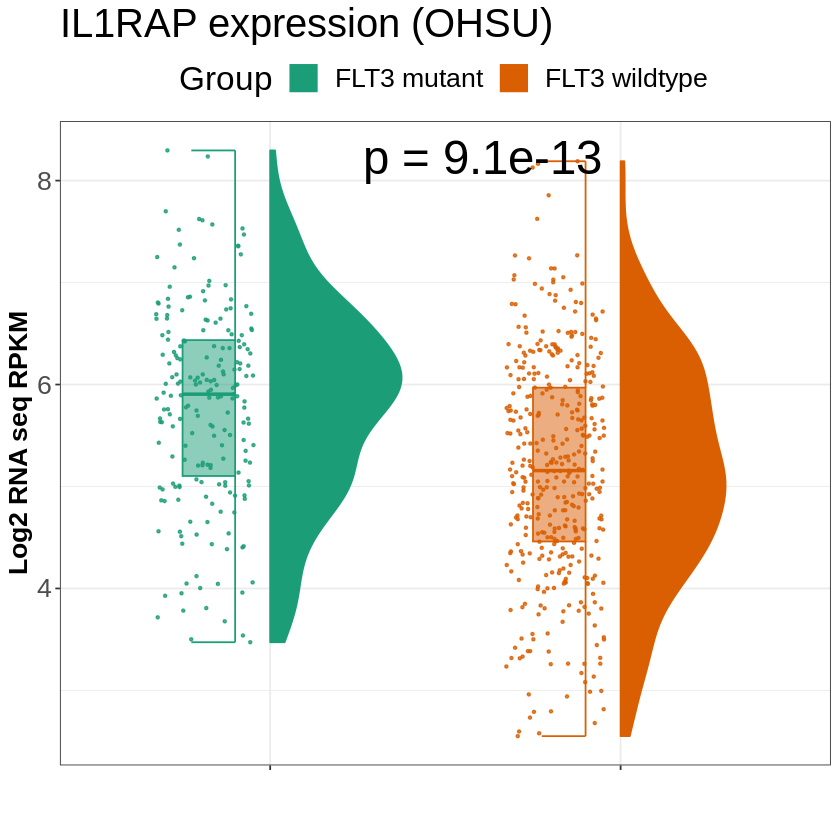

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


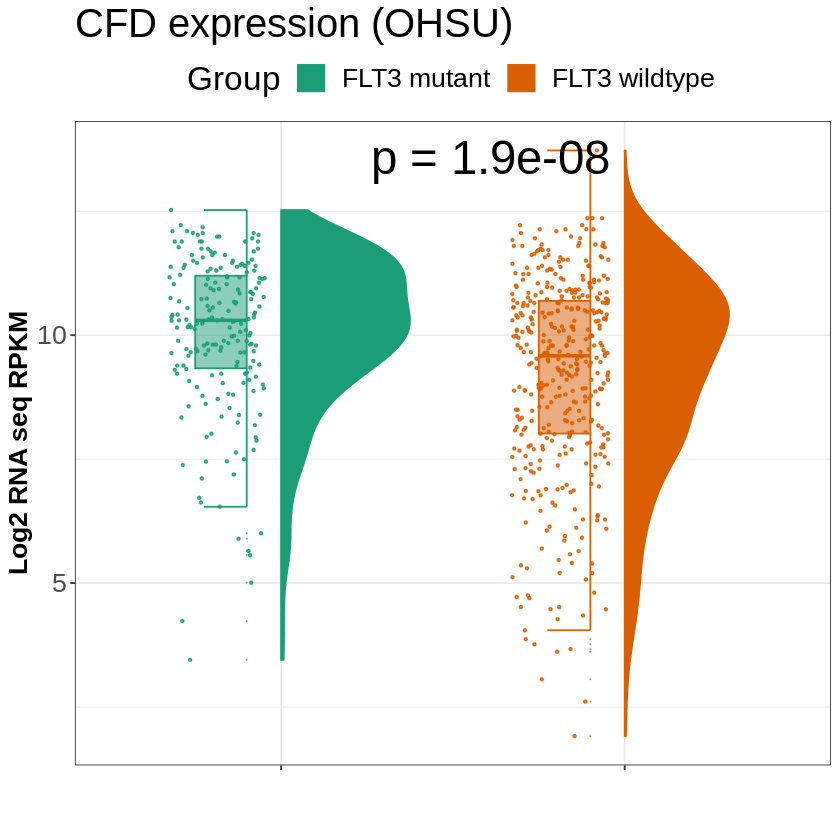

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


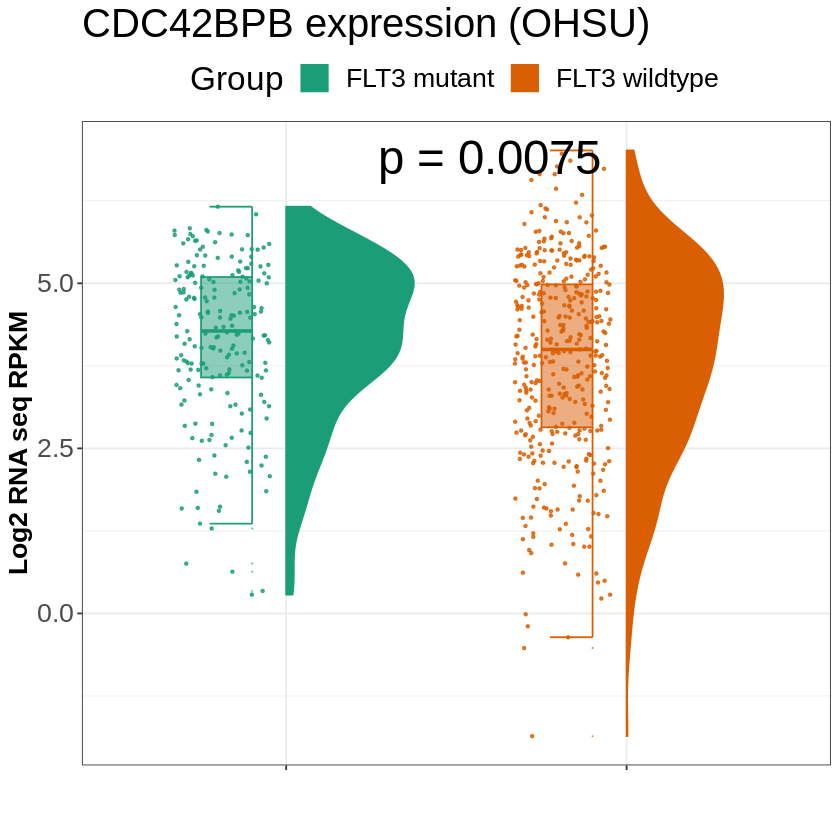

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


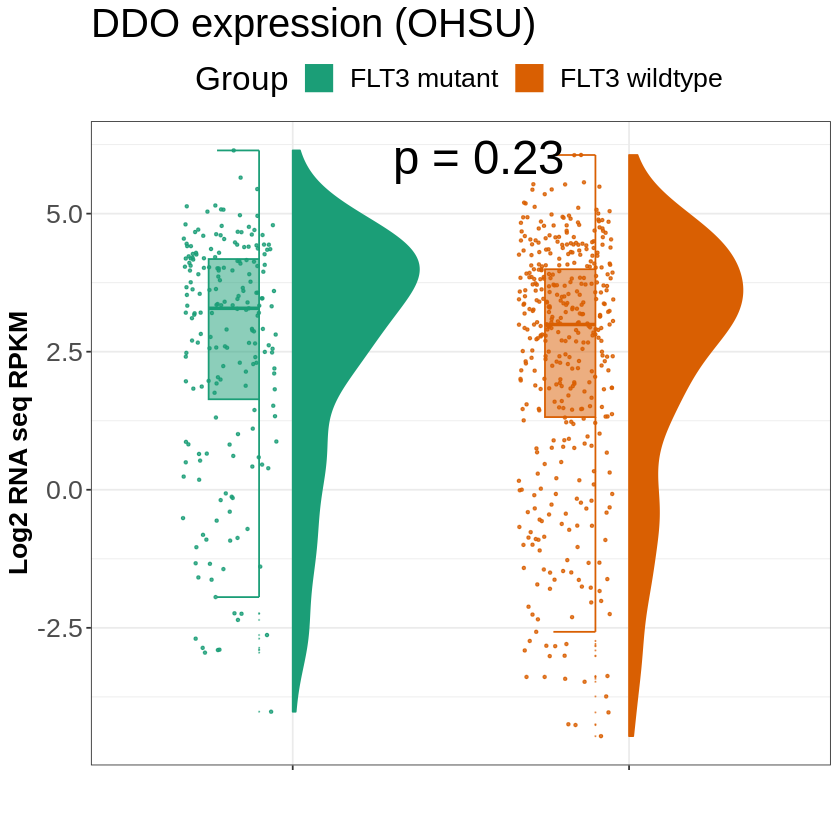

Warning message in stat_compare_means(label = "p.format", label.x = 1.4, size = 10, :
“Ignoring unknown parameters: `p.adjust.method`”


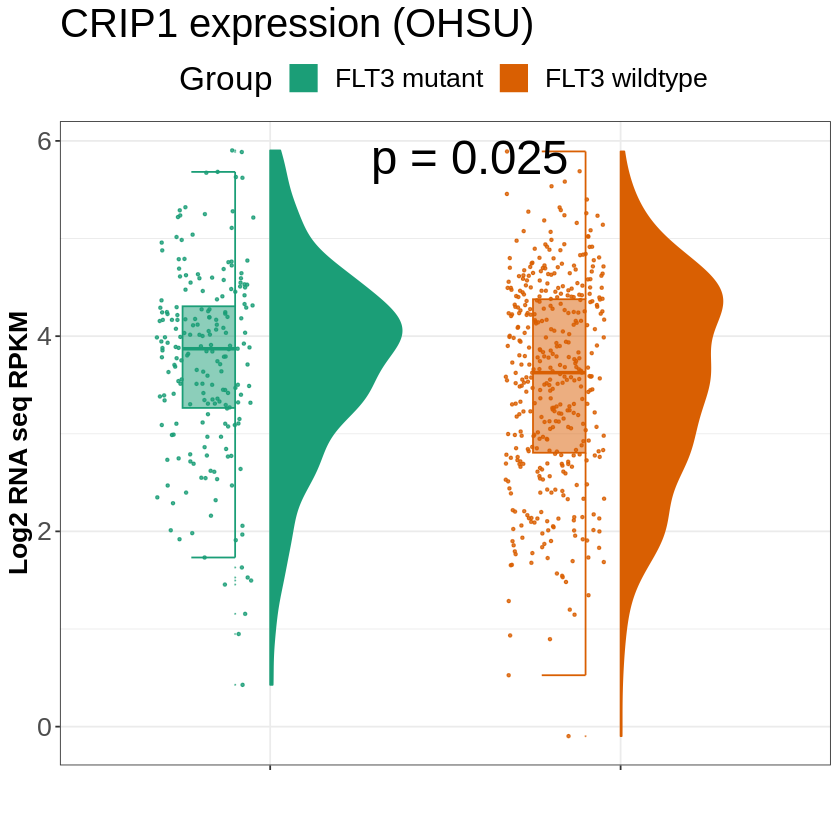

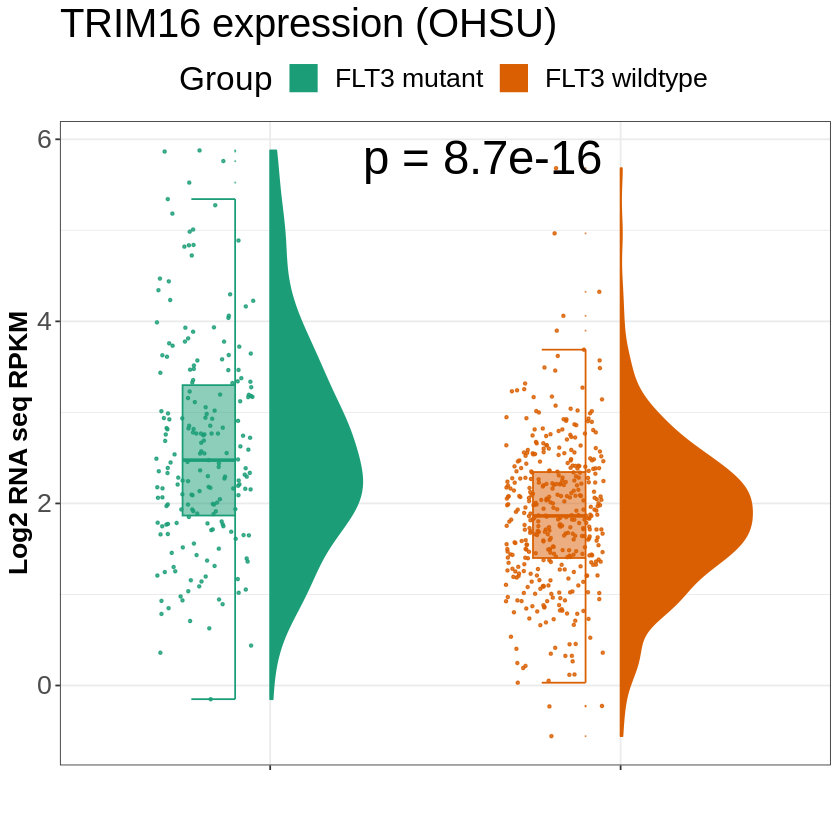

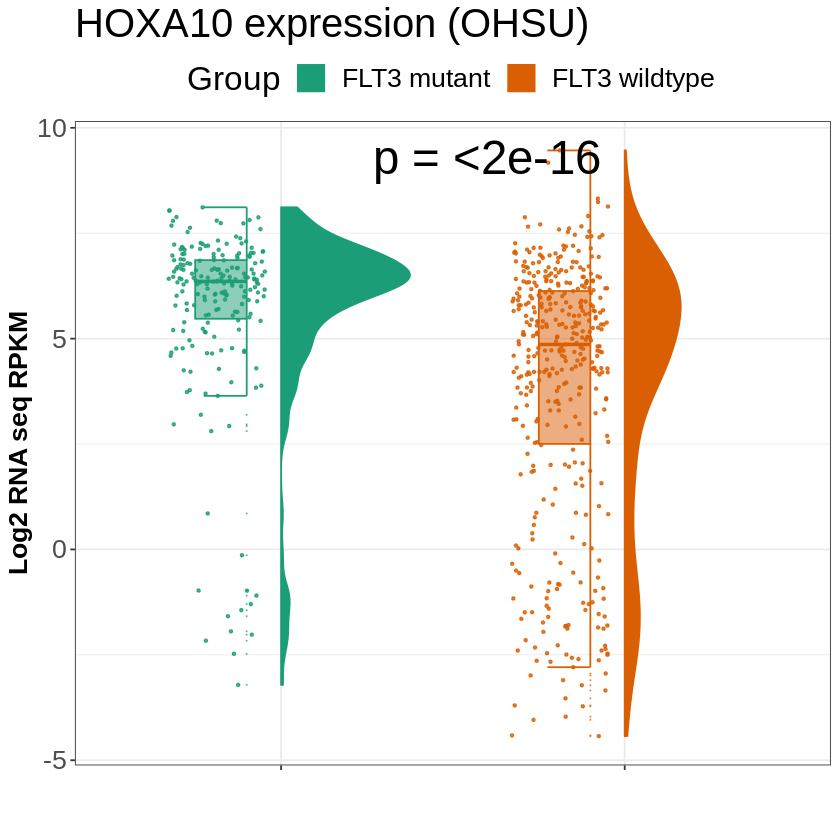

In [13]:
for (gene in unique(ohsu_final$geneID)) {
  comp_exp <- subset(ohsu_final, ohsu_final$geneID %in% gene)
  p <- ggplot(comp_exp, aes(x=Group, y=value)) + theme_bw() +
    geom_half_point(aes(y=value, fill=Group, color=Group), side="l", size=0.6, alpha=0.8) +
    geom_half_boxplot(aes(y=value, color=Group, fill=Group), side="l", width=0.5, alpha=0.5, nudge=0.1, outlier.size=0) +
    geom_half_violin(aes(y=value, fill=Group, color=Group), side="r") +
    stat_compare_means(label = "p.format", label.x = 1.4, size=10, vjust=0.7, method="t.test", paired=FALSE, p.adjust.method = "BH") +
    scale_x_discrete(labels=c("","")) + xlab("") + ylab("Log2 RNA seq RPKM") +
    ggtitle(paste0(gene," expression (OHSU)")) +
    scale_fill_brewer(palette="Dark2") + scale_color_brewer(palette="Dark2")

  print(p)
}